In [1]:
#한글 깨짐 방지 ->런타임 다시시작

import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


**꺾은선 그래프로 표현하기**

찾고 싶은 지역명을 입력해주세요 :제주


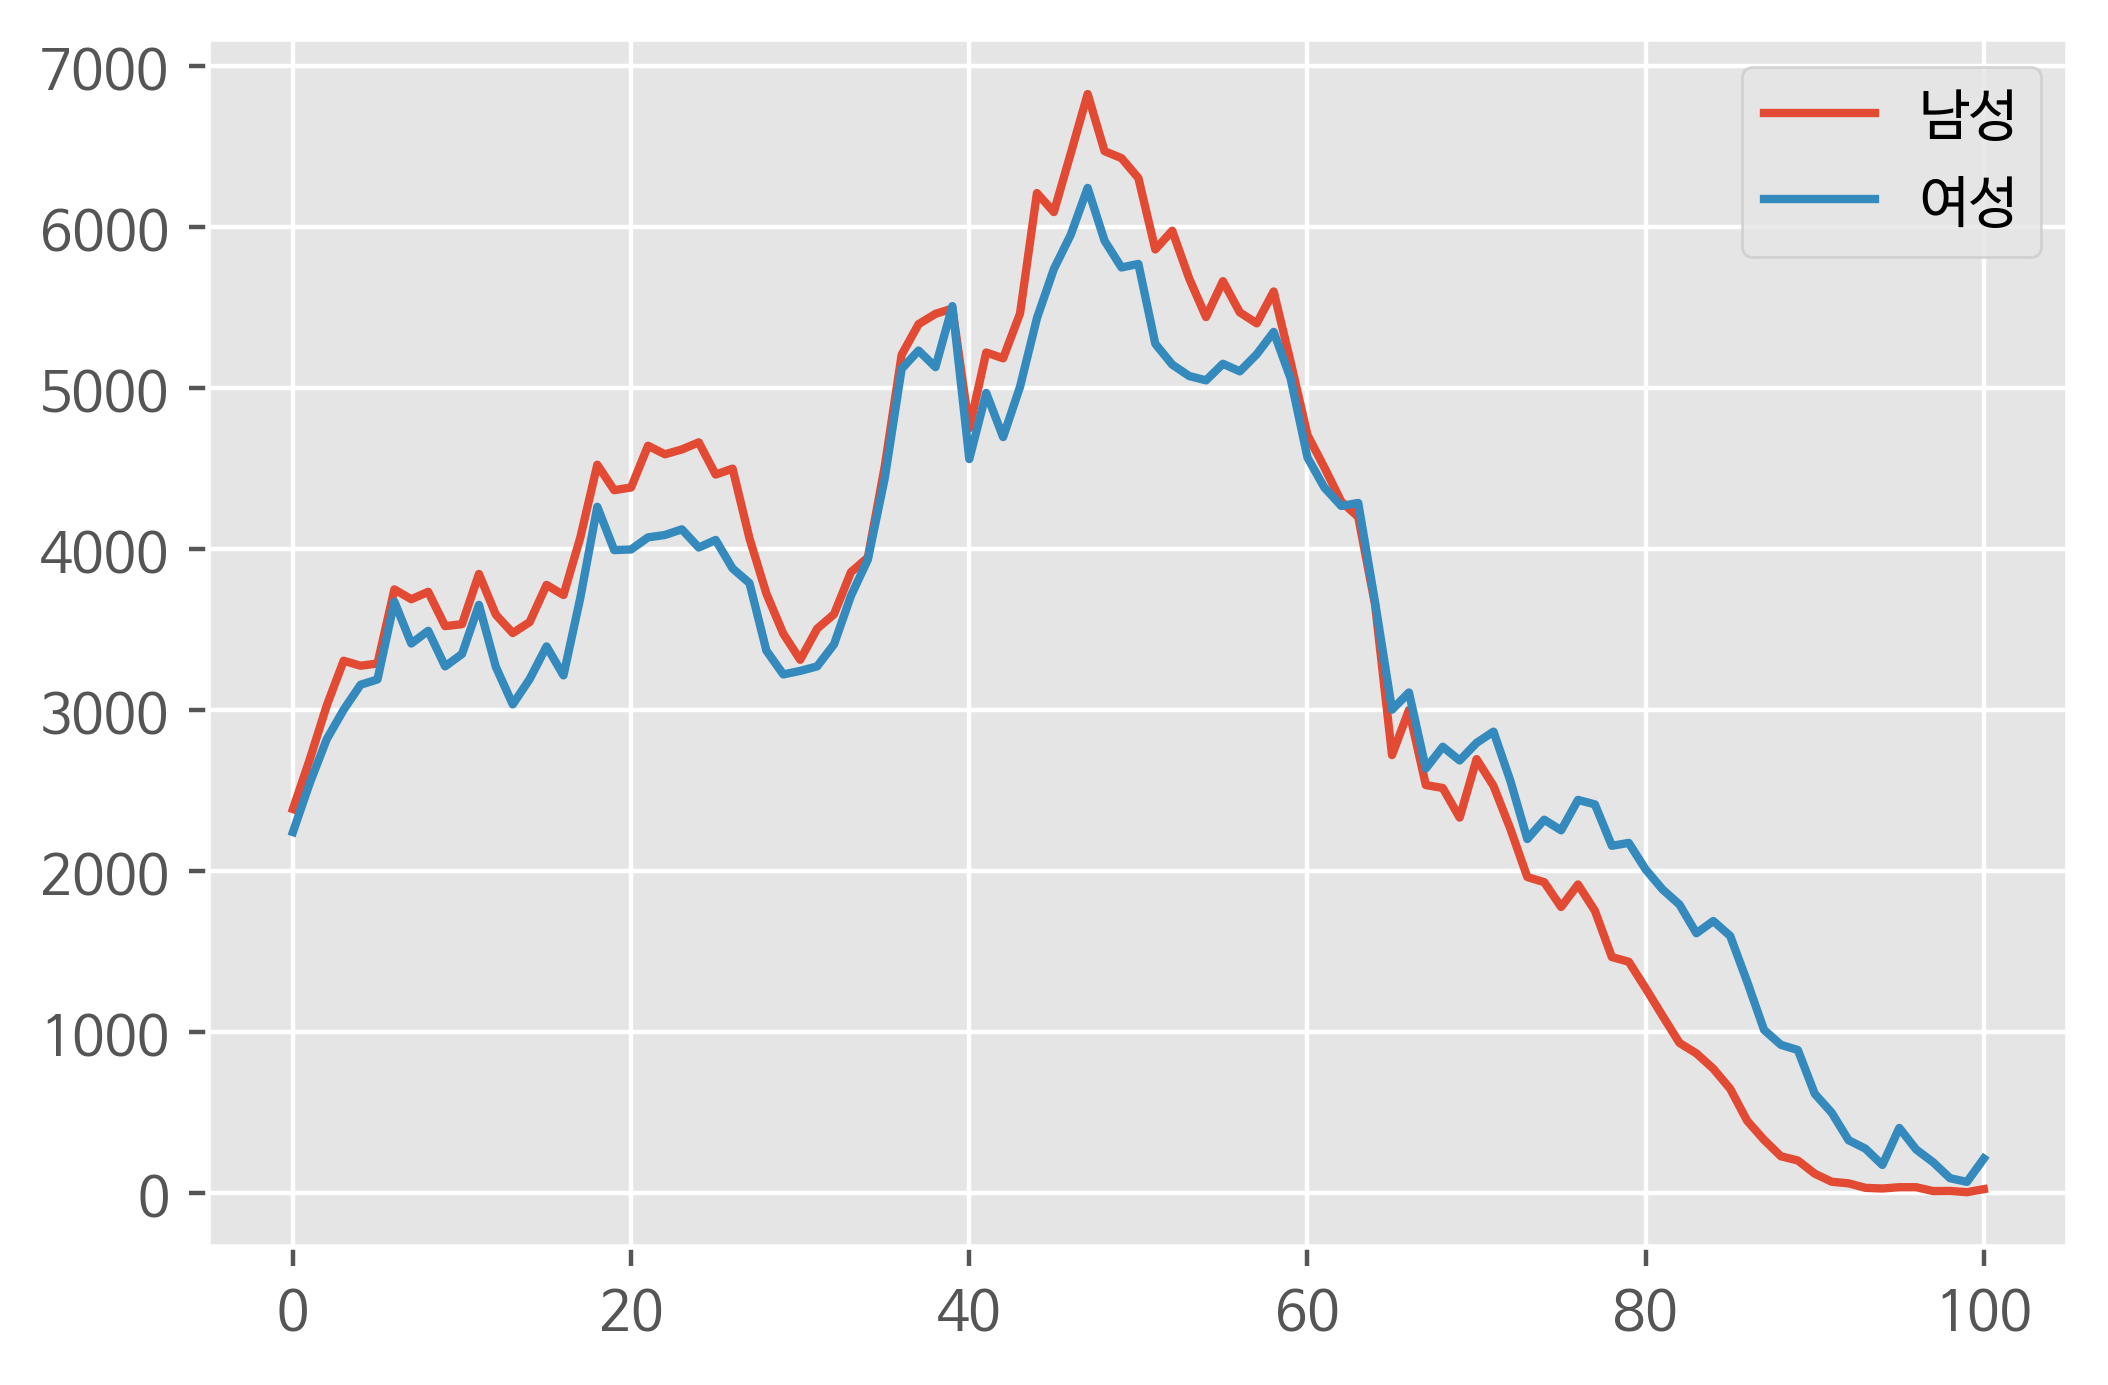

In [5]:
import csv
import matplotlib.pyplot as plt

f = open('gender.csv', 'r', encoding='cp949')
data = csv.reader(f)
next(data)

name = input('찾고 싶은 지역명을 입력해주세요 :')

m = []
f = []

for row in data:
  if name in row[0]:
    for i in row[3:104] :  # 남성 데이터 컬럼 3~103 개의 데이터를 슬라이싱 - 정수 데이터로 변환 -> m리스트에 저장
      m.append(int(i.replace(',','')))  # 항아리 차트를 그리기 위해 음수로 변환 시키는 작업을 먼저 해준다.
    for j in row[106:] :  # 여성 데이터 : 106~ 끝까지 데이터 슬라이싱 -> 정수 데이터로 변환 -> fe리스트에 저장
      f.append(int(j.replace(',','')))
    break  # 첫번째 데이터만 확인하고 탈출하기 위해서

# 시각화 설정
plt.figure(dpi = 200)
plt.style.use('ggplot')
plt.rc('font', family = 'NanumBarunGothic')

#꺾은선 그래프로 남녀의 인구수 데이터 표현하기
plt.plot(m, label='남성')
plt.plot(f, label='여성')
plt.legend()
plt.show()

연령별로 남성 인구수에서 여성 인구수를 뺀 차이의 막대그래프 그리기


찾고 싶은 지역명을 입력해주세요 :서울


No handles with labels found to put in legend.


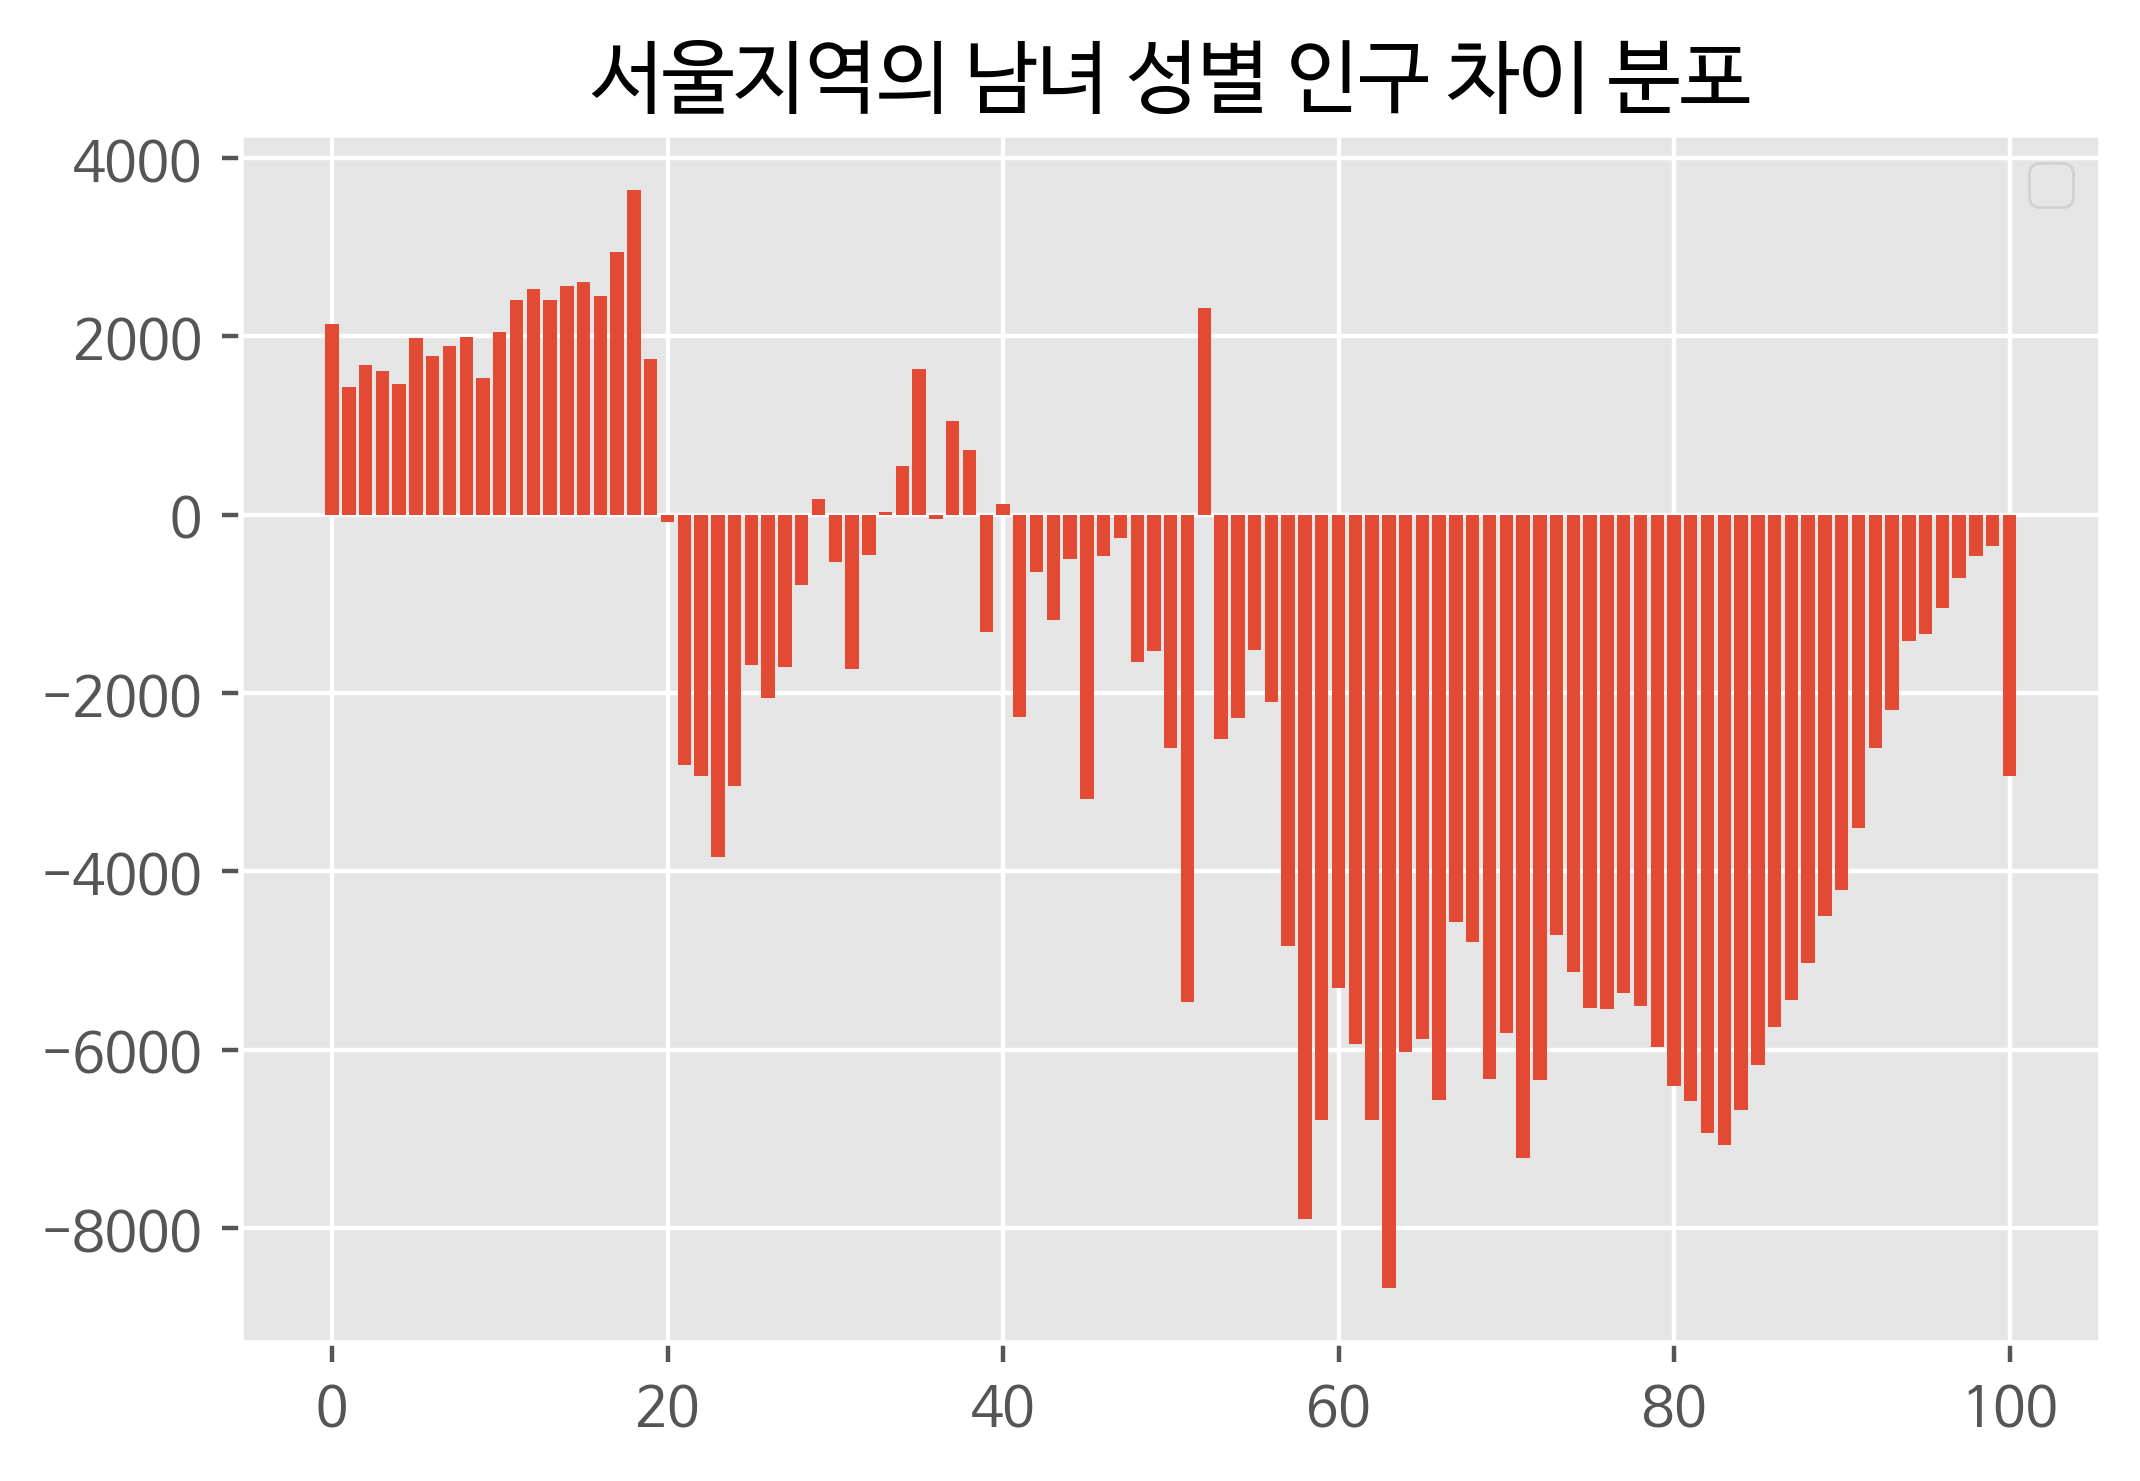

In [8]:
import csv
import matplotlib.pyplot as plt

f = open('gender.csv', 'r', encoding='cp949')
data = csv.reader(f)
next(data)

result=[]  # 남성 인구 - 여성 인구 값을 담을 리스트 변수 선언

name = input('찾고 싶은 지역명을 입력해주세요 :')
for row in data:
  if name in row[0]:
    for i in range(3,104) : #3번째 인덱스부터 시작해서
      result.append(int(row[i].replace(',', '')) - int(row[i+103].replace(',', ''))) #여성이 106번부터 시작해서
    break

 # 시각화 설정
plt.figure(dpi = 200)
plt.style.use('ggplot')
plt.rc('font', family = 'NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

plt.title(name+'지역의 남녀 성별 인구 차이 분포')
plt.bar(range(101), result)

plt.show()     

산점도로 표현하기 scatter()

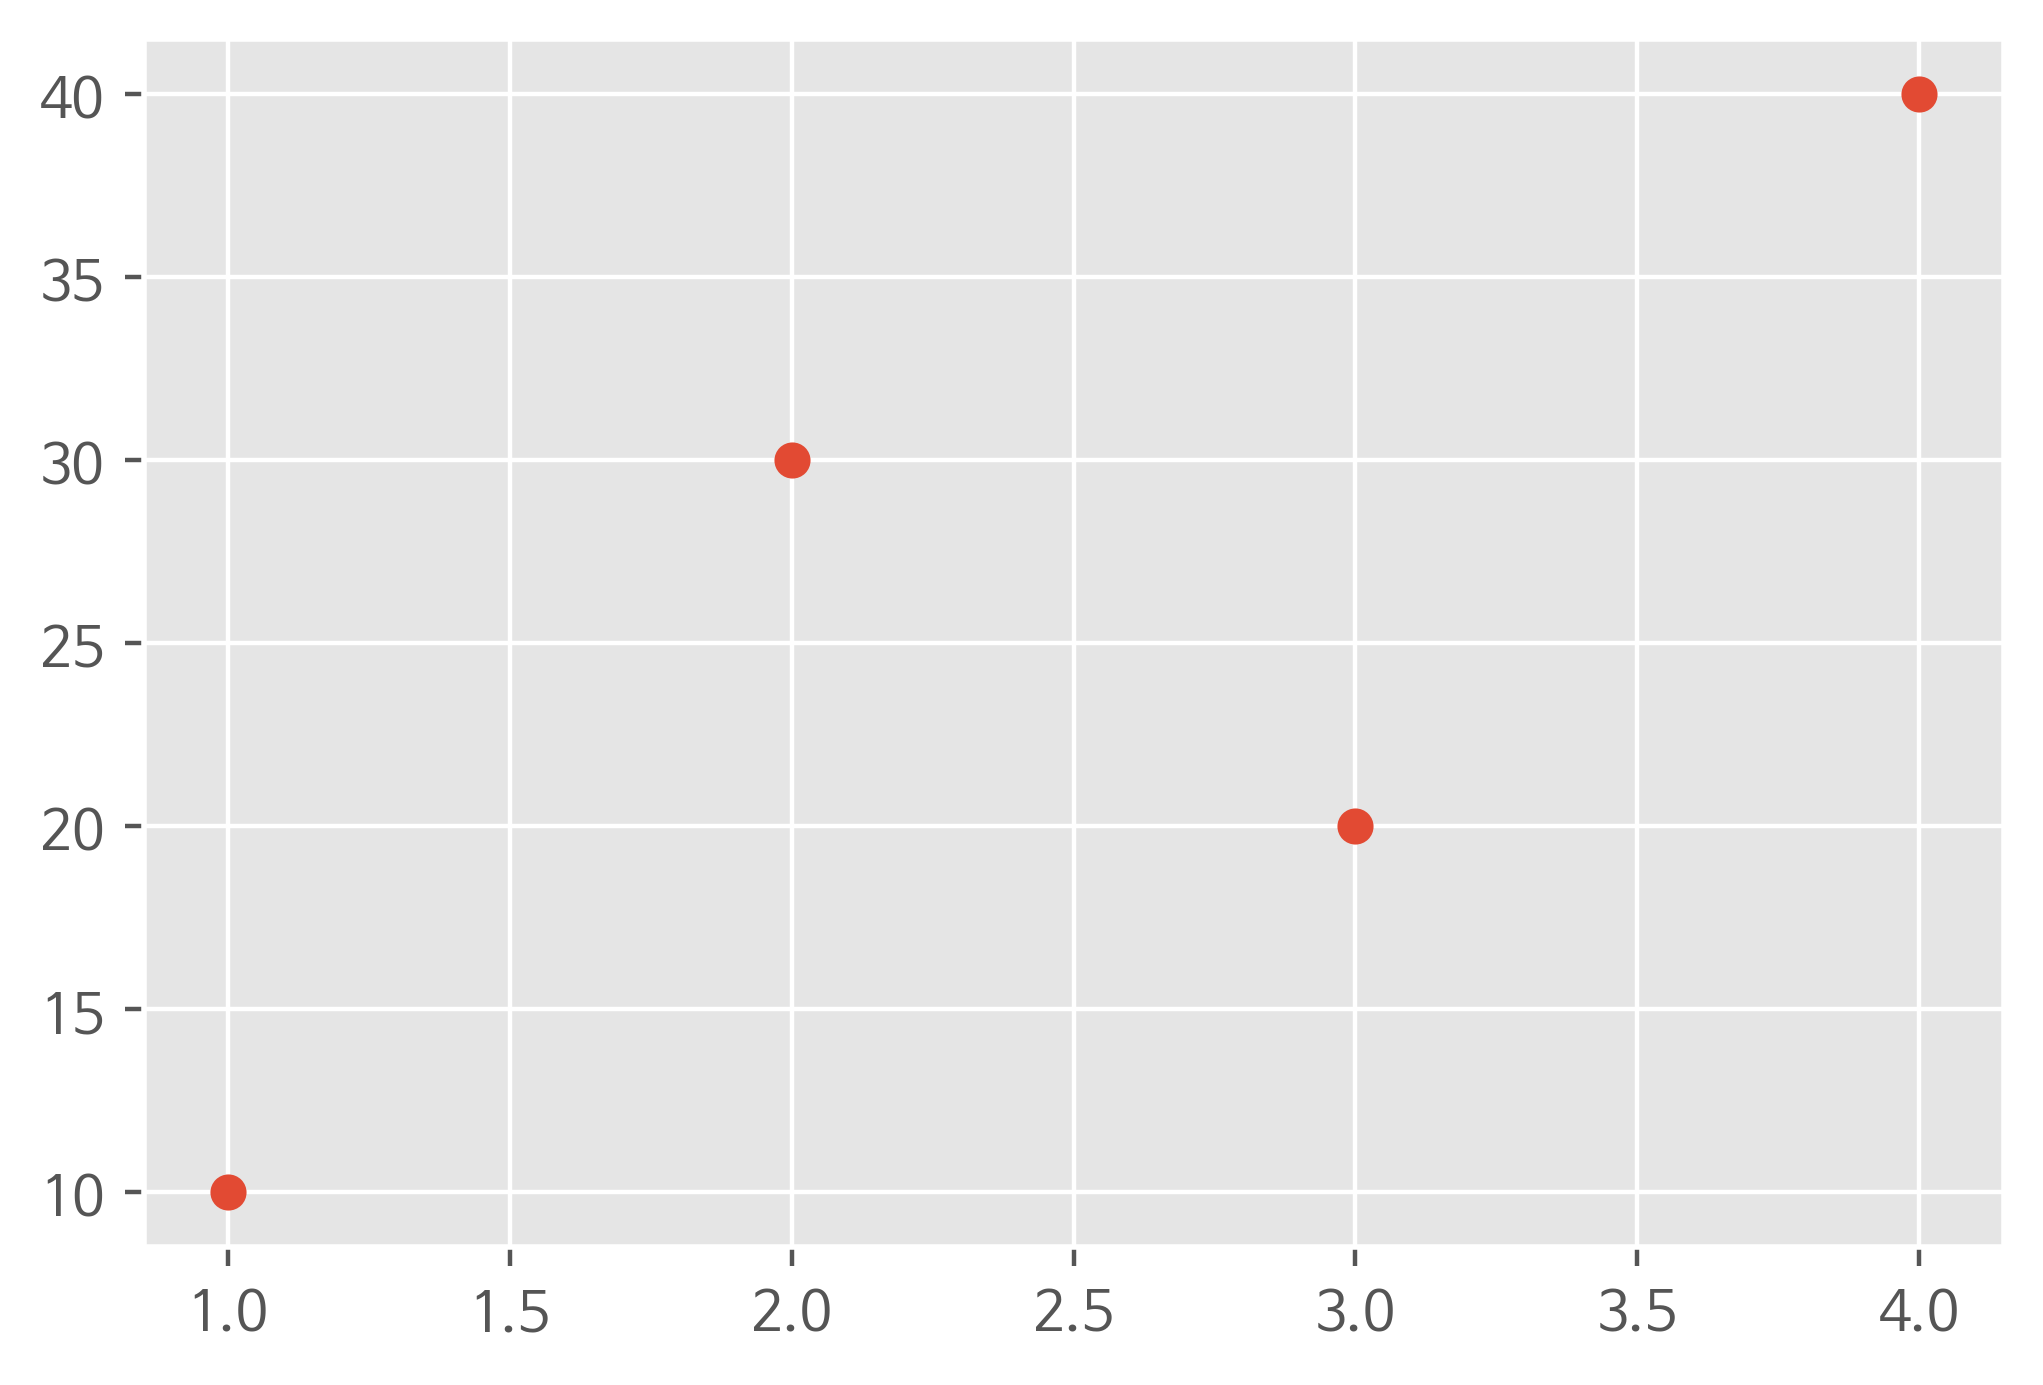

In [9]:
import matplotlib.pyplot as plt

plt.figure(dpi=200)
plt.style.use('ggplot')
plt.scatter([1,2,3,4],[10,30,20,40])  #scatter(x,y)
plt.show()

**점크기 크게하기**

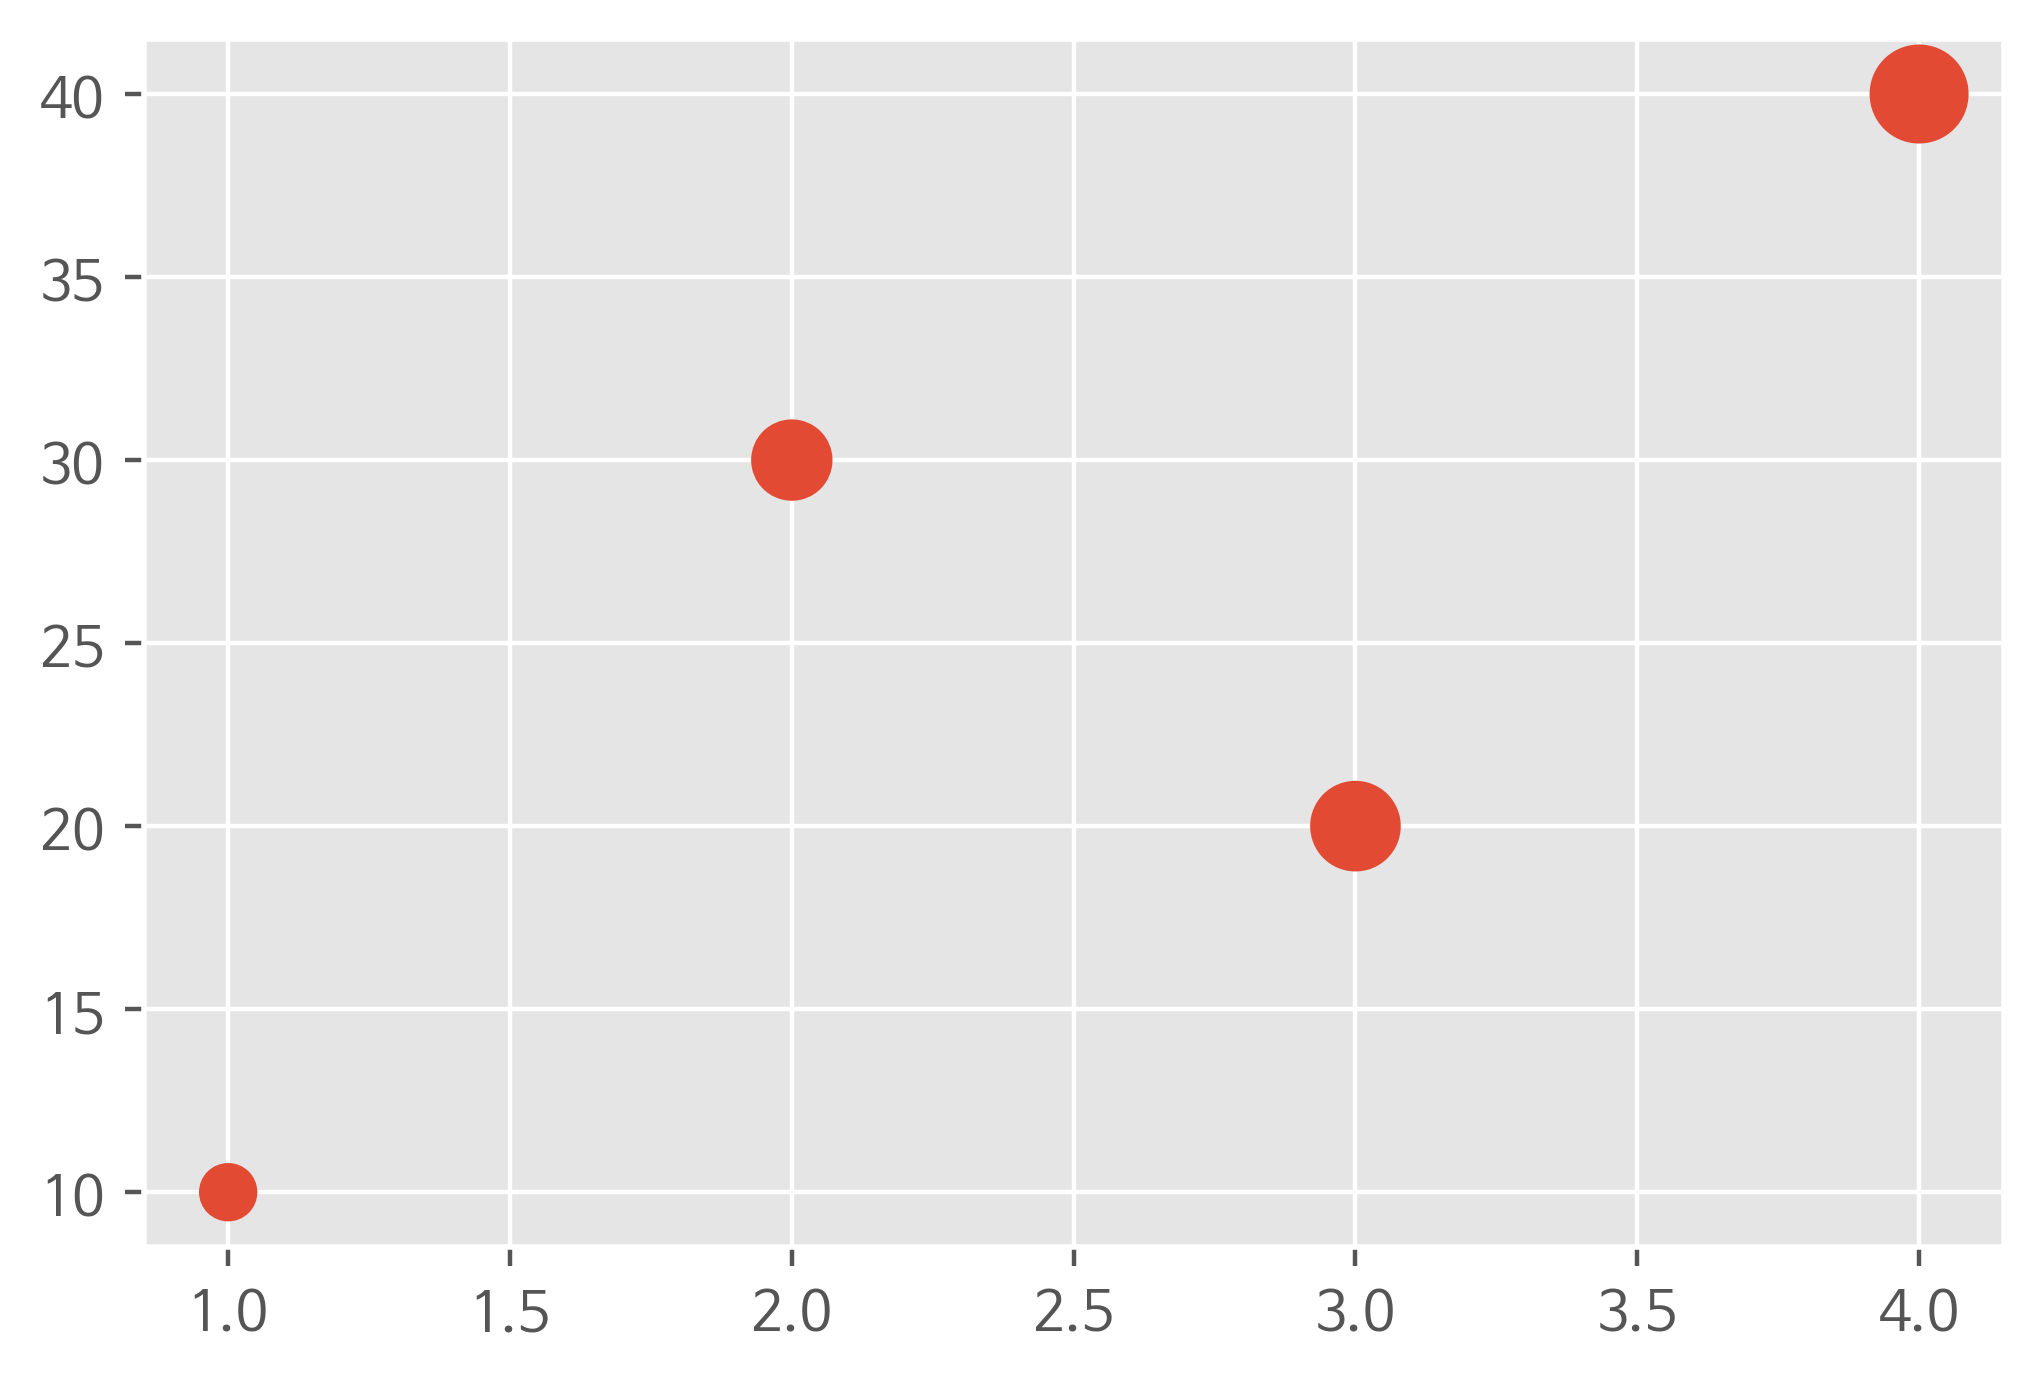

In [10]:
import matplotlib.pyplot as plt

plt.figure(dpi=200)
plt.style.use('ggplot')
plt.scatter([1,2,3,4],[10,30,20,40], s=[100,200,250,300])  #scatter(x,y) #s-> size 점의 크기
plt.show()

**점 색깔 바꾸기**

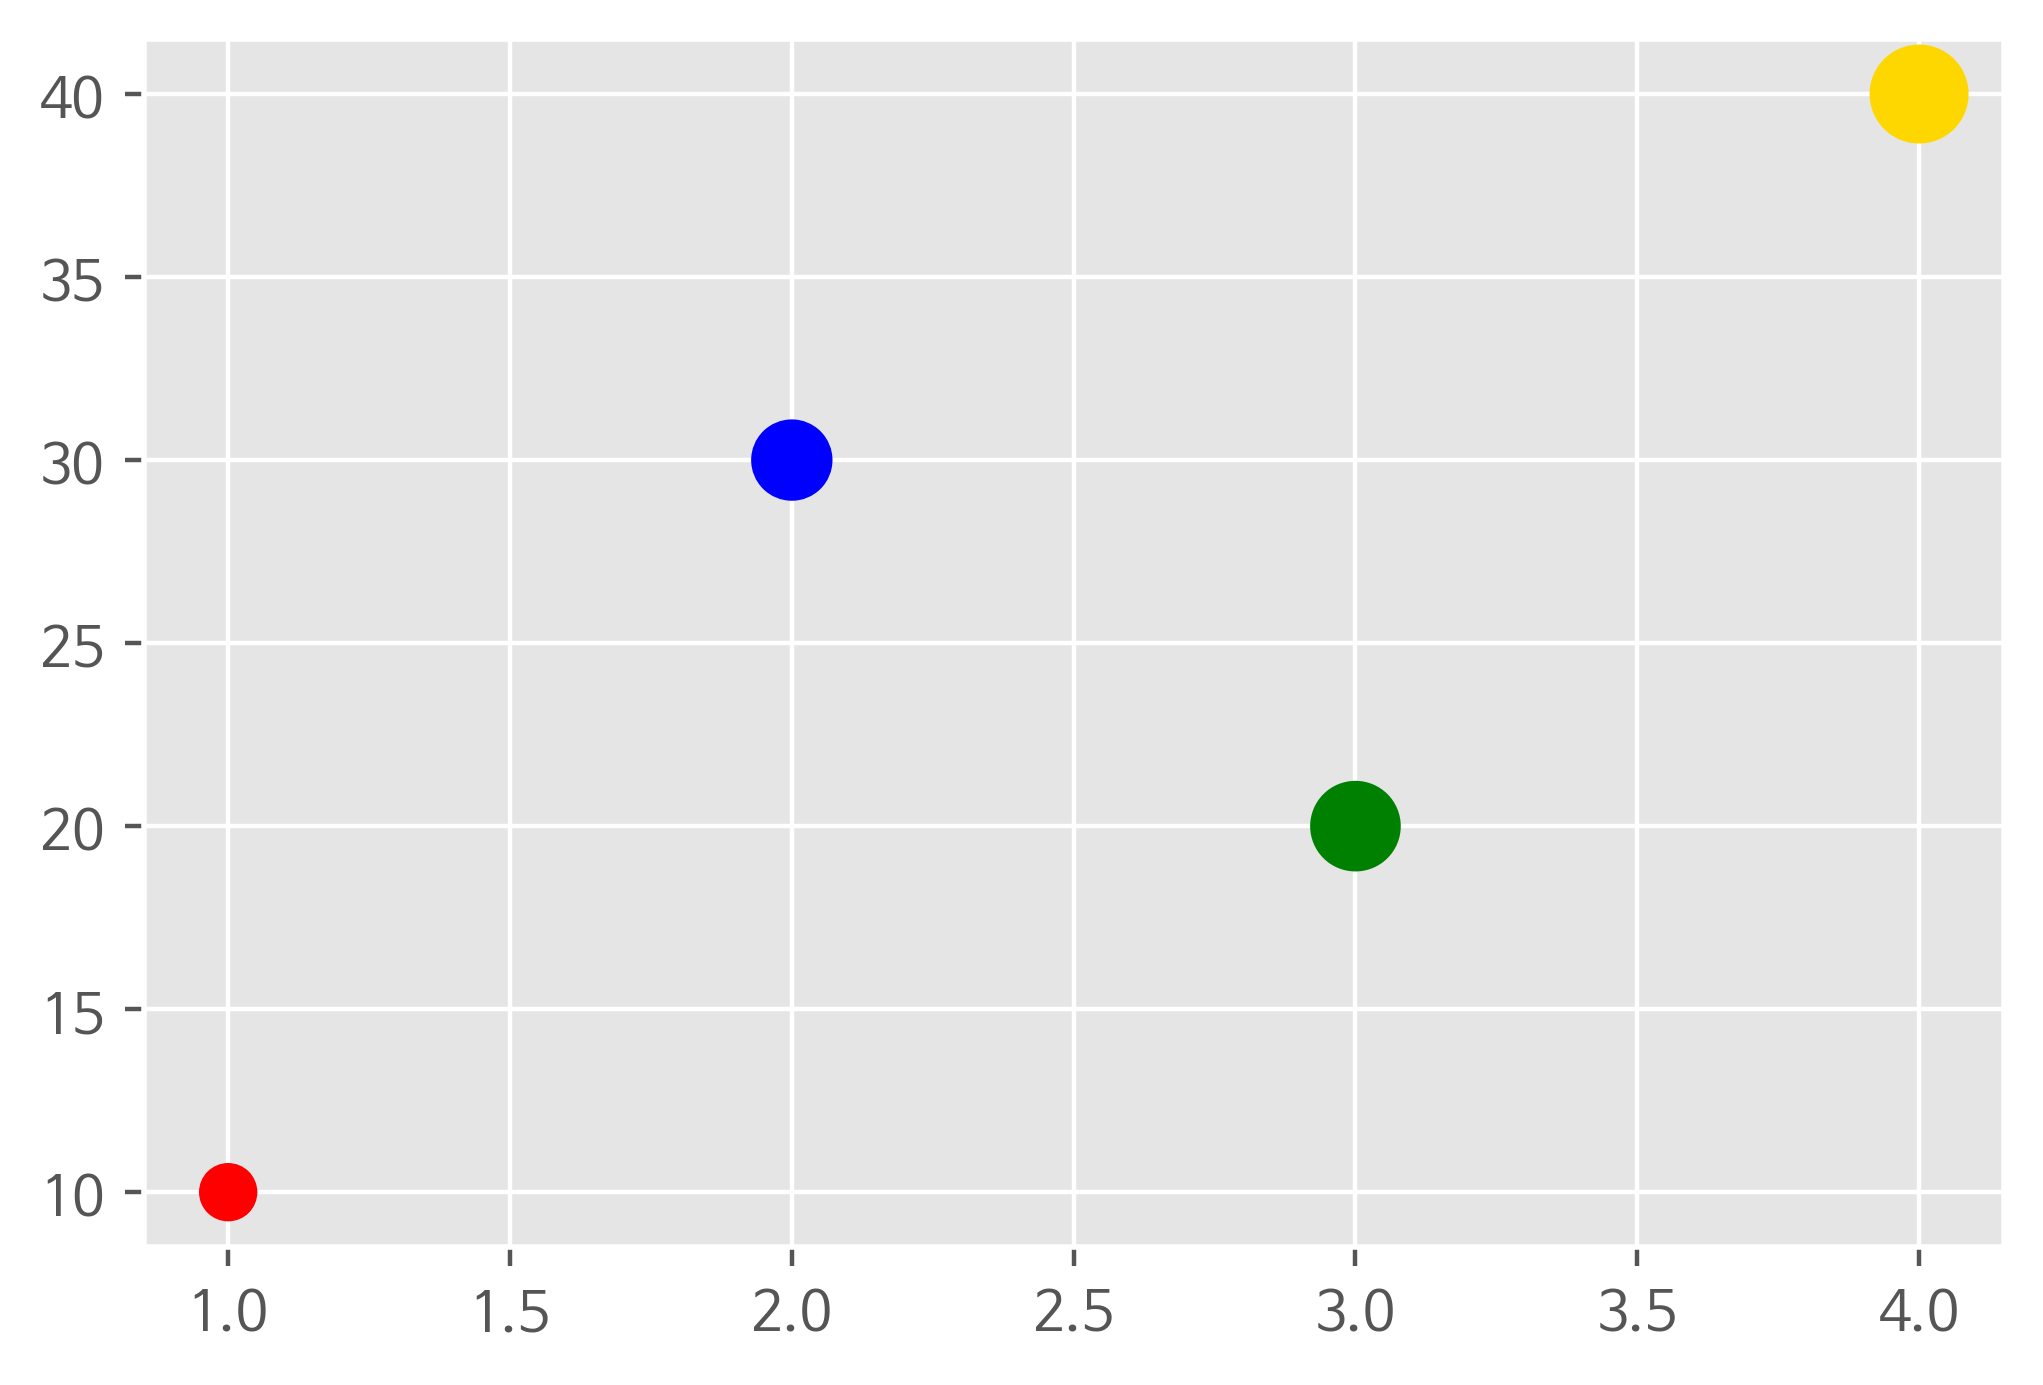

In [11]:
import matplotlib.pyplot as plt

plt.figure(dpi=200)
plt.style.use('ggplot')
plt.scatter([1,2,3,4],[10,30,20,40], s=[100,200,250,300], c= ['red','blue','green','gold']) #c-> color 점의 색깔
plt.show()

***color bar!***

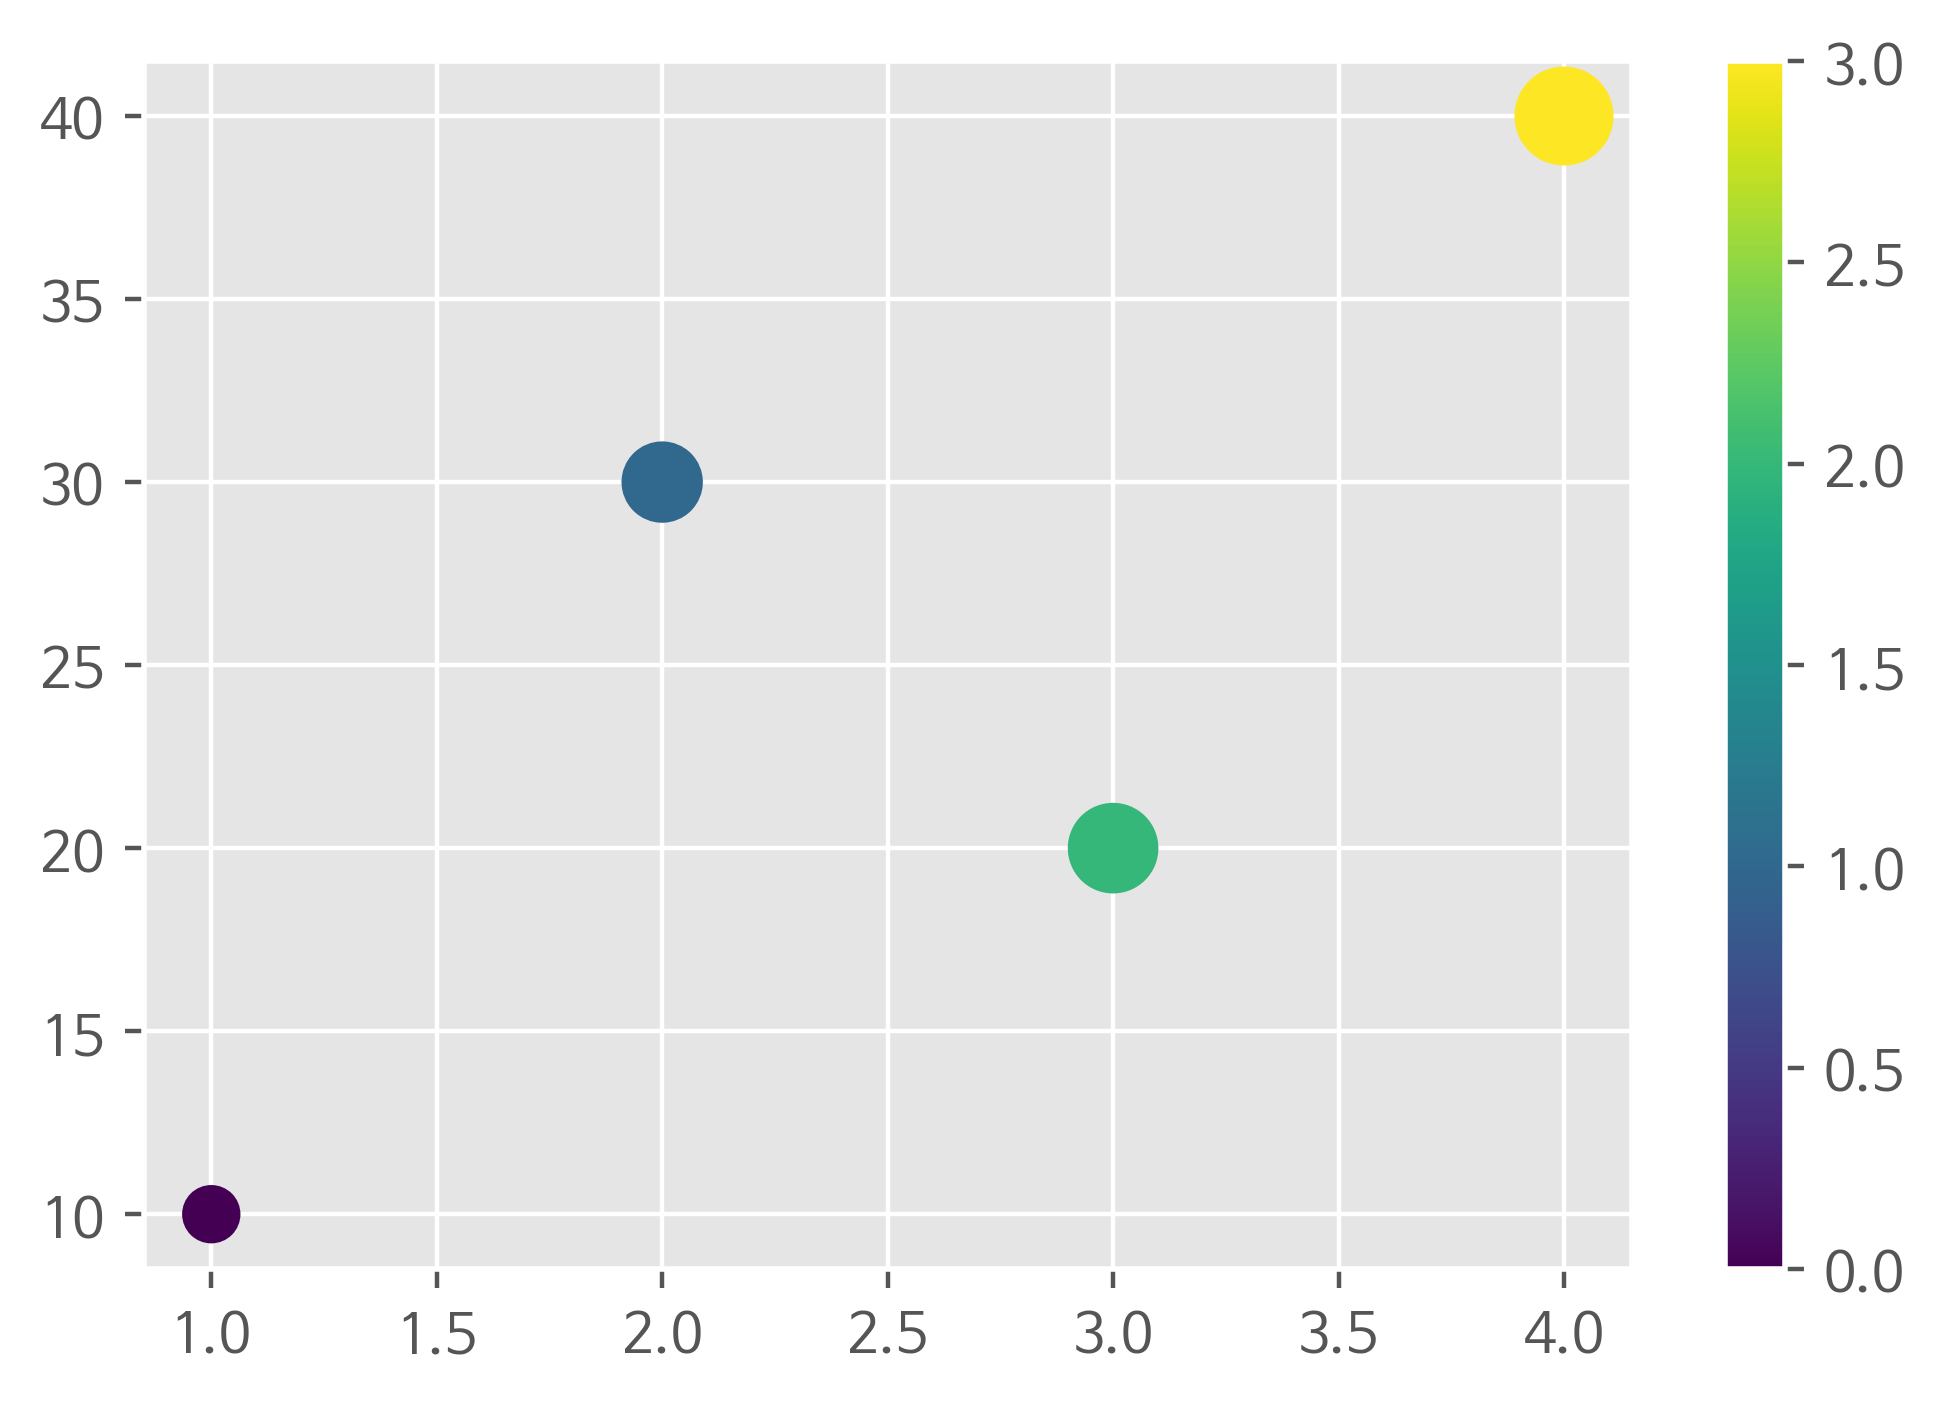

In [13]:
import matplotlib.pyplot as plt

plt.figure(dpi=200)
plt.style.use('ggplot')
plt.scatter([1,2,3,4],[10,30,20,40], s=[100,200,250,300], c= range(4)) #컬러를 자동으로 준다 
plt.colorbar()
plt.show()

***cmap='jet' 무지개색!***

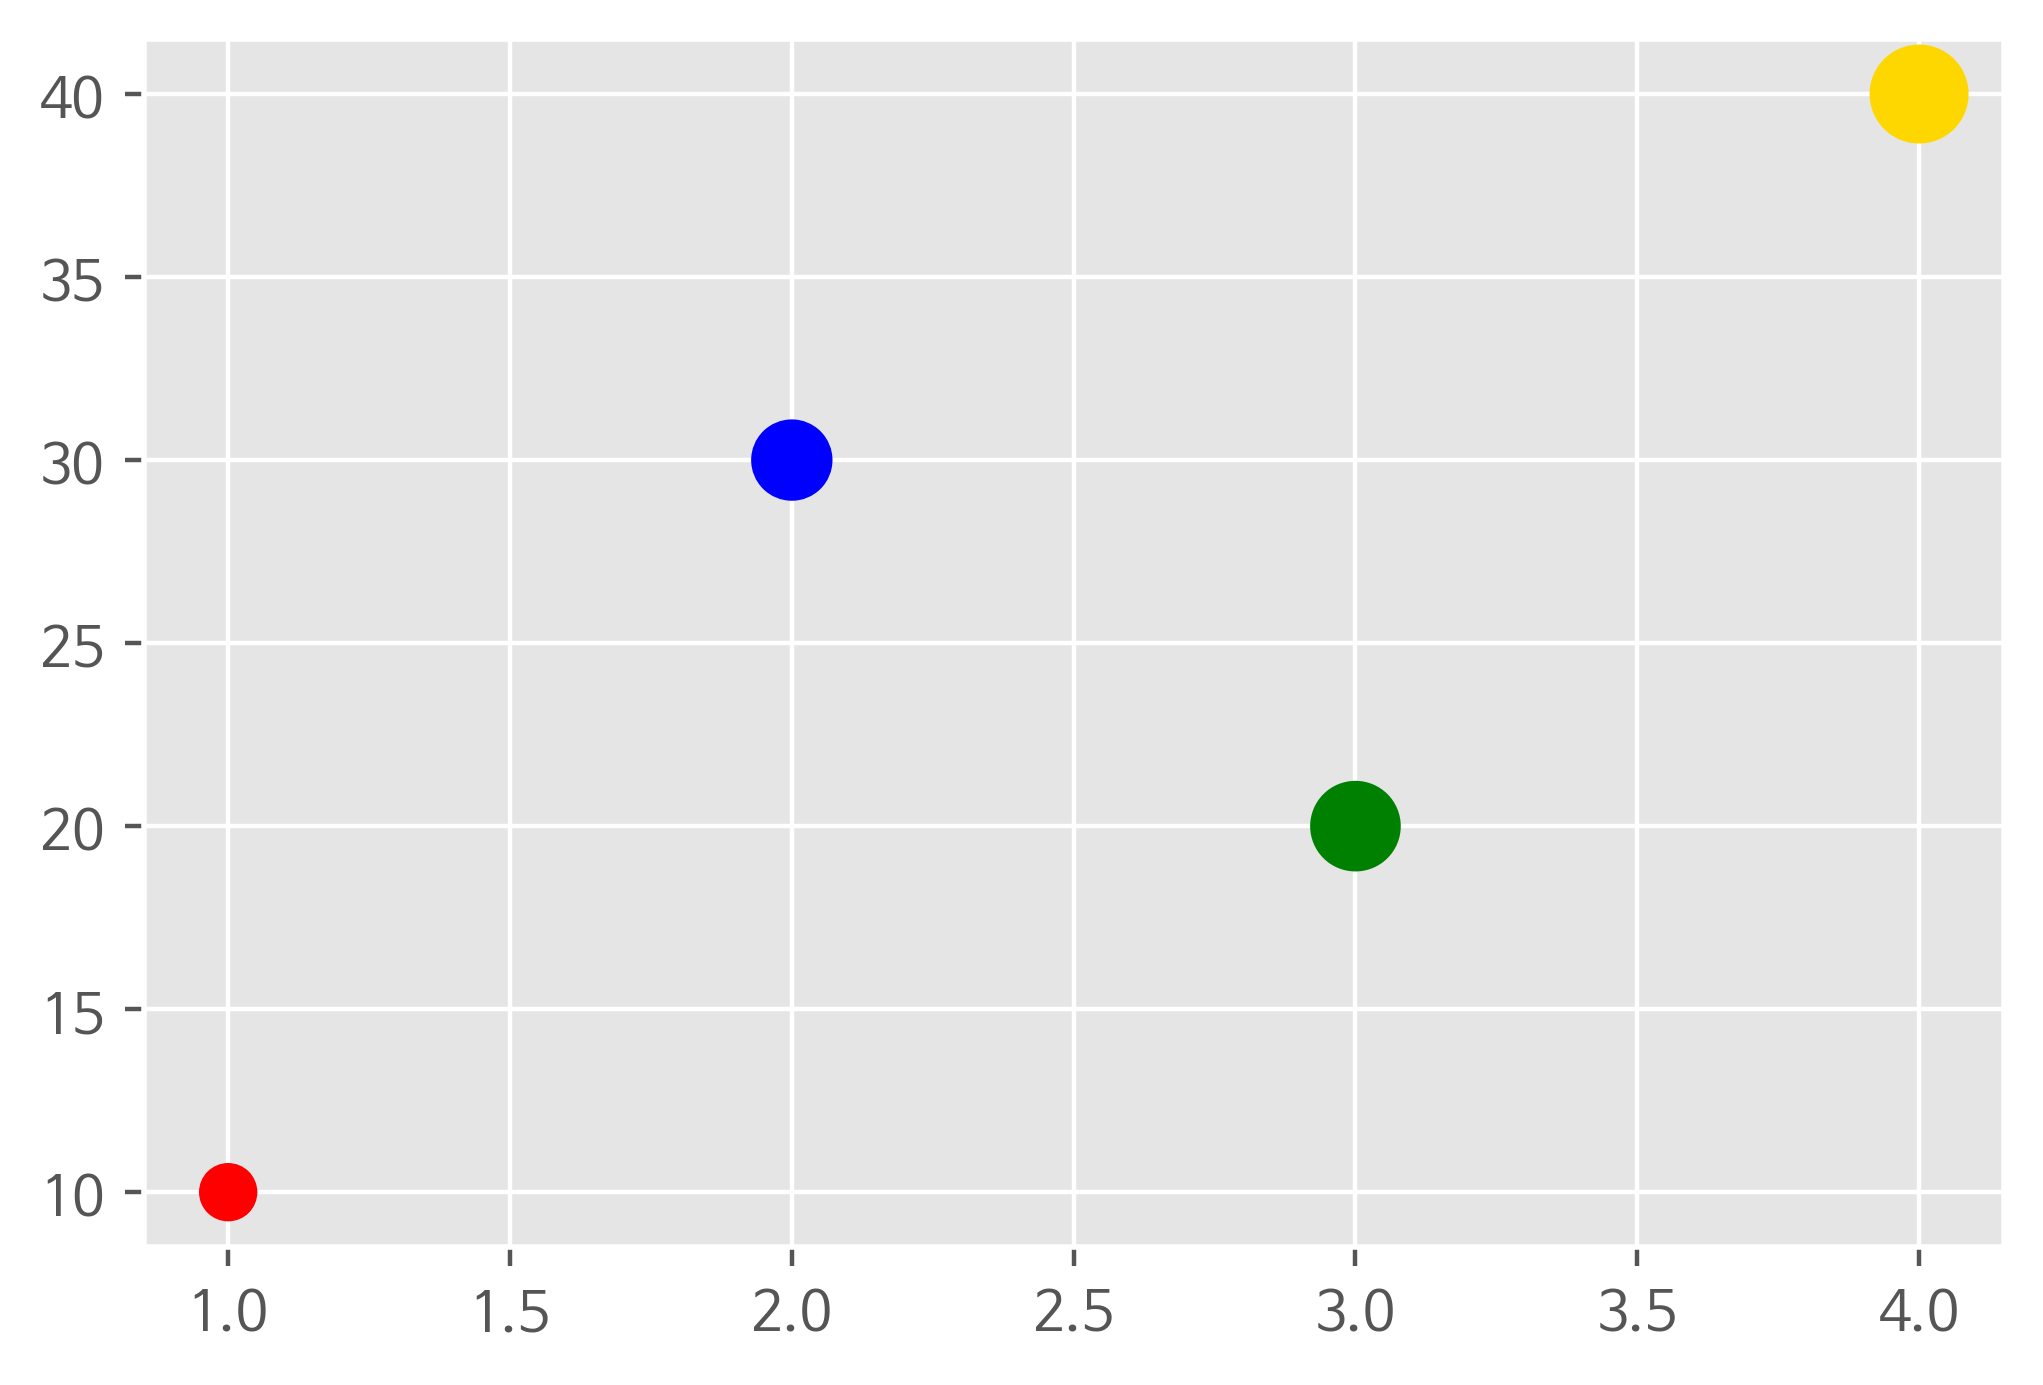

In [14]:
import matplotlib.pyplot as plt

plt.figure(dpi=200)
plt.style.use('ggplot')
plt.scatter([1,2,3,4],[10,30,20,40], s=[100,200,250,300], c= ['red','blue','green','gold'], cmap='jet')
plt.show() 

위치, 크기가 서로 다른 100개의 점 만들기

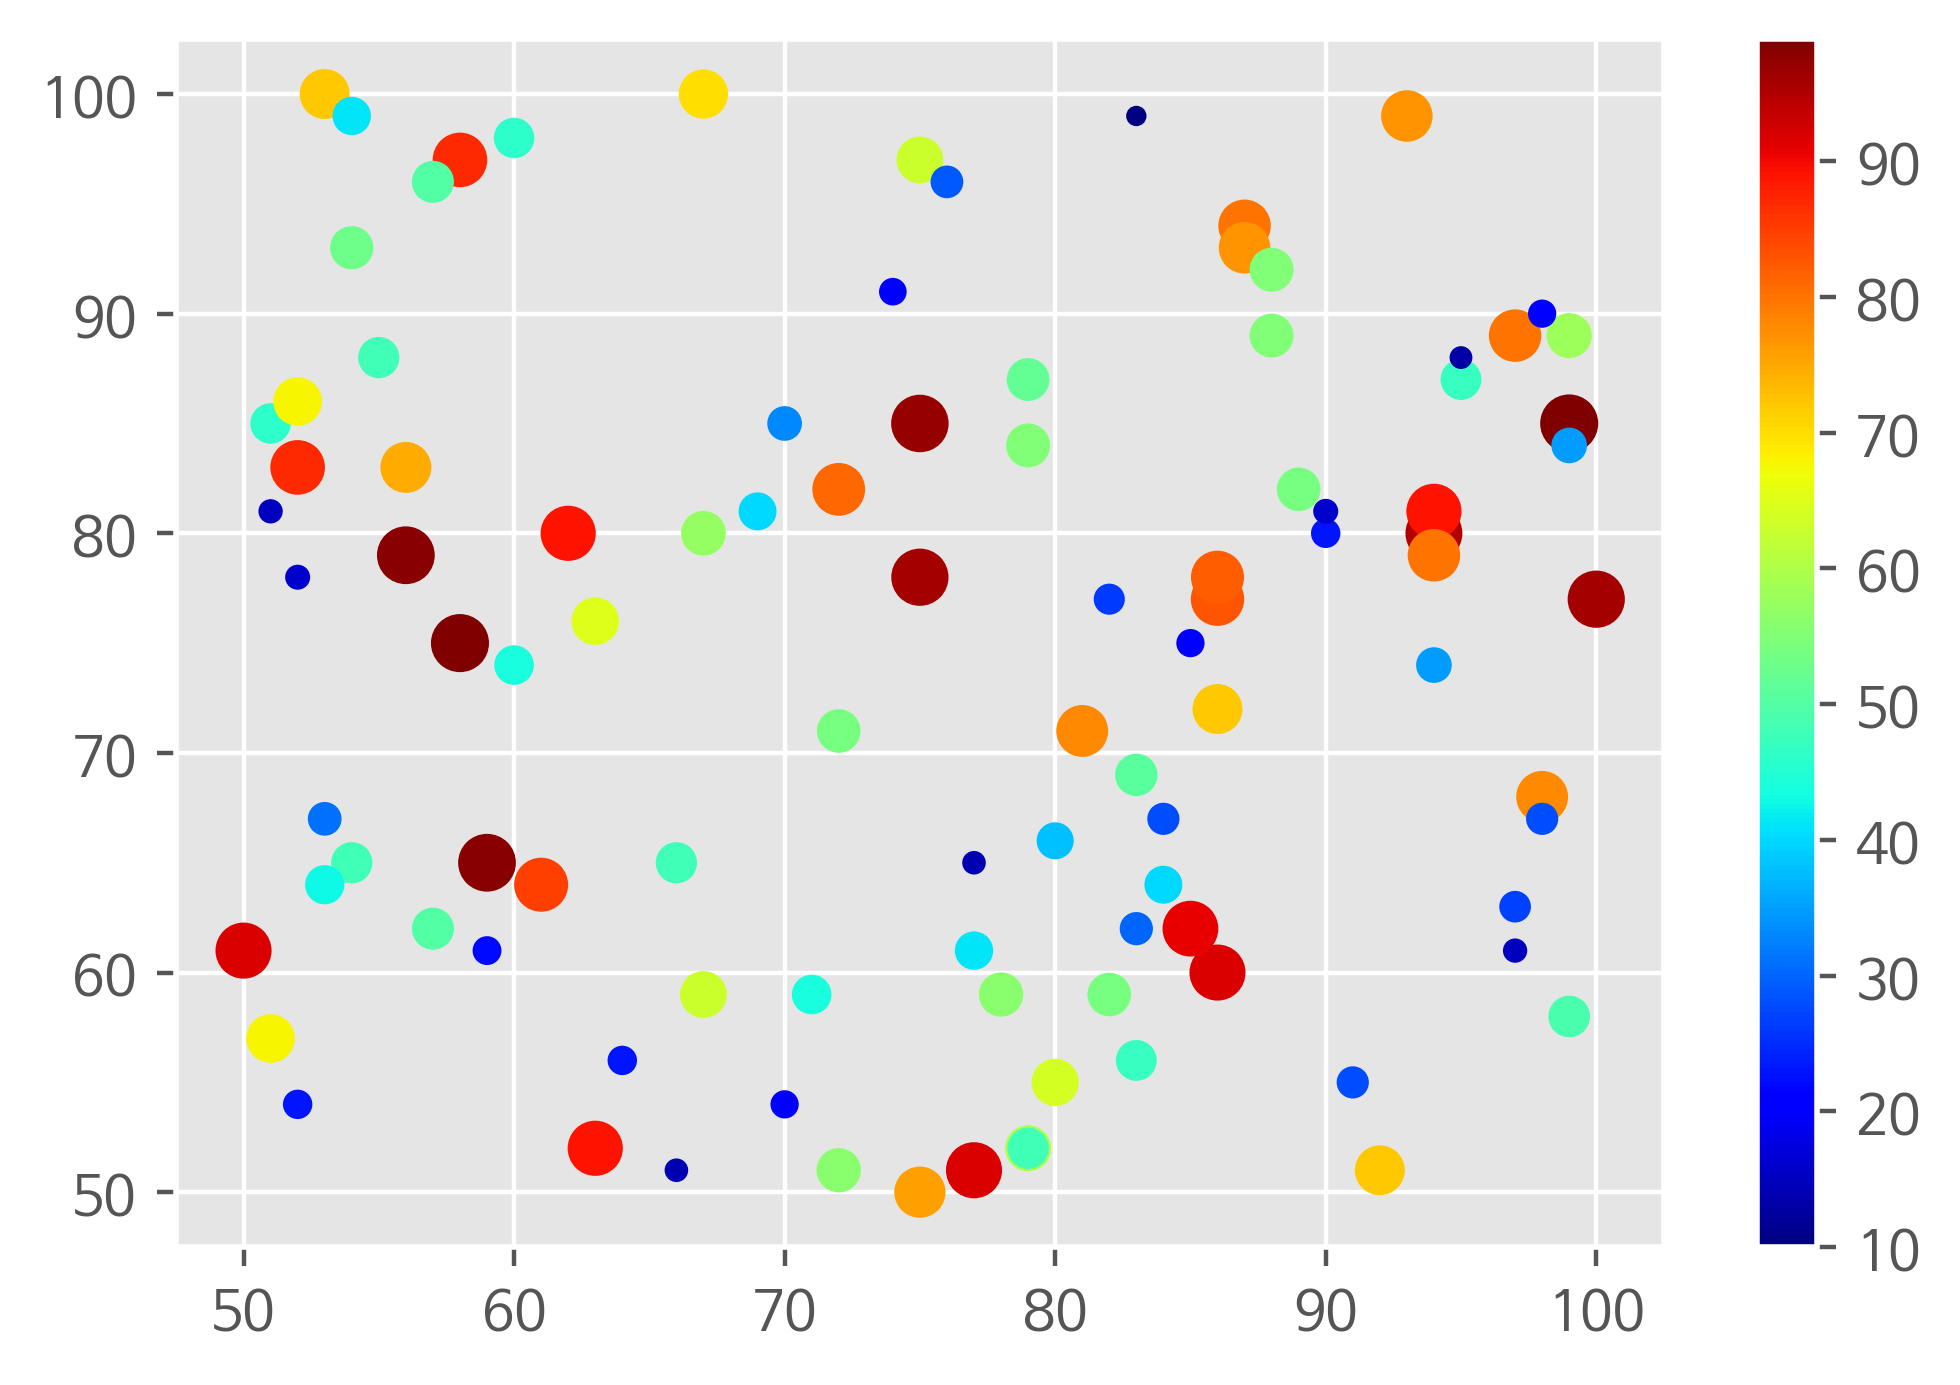

In [18]:
import matplotlib.pyplot as plt
import random

x=[]
y=[]
size=[]

for i in range(100) :
  x.append(random.randint(50,100))
  y.append(random.randint(50,100))
  size.append(random.randint(10,100))

plt.figure(dpi=200)
plt.style.use('ggplot')
plt.scatter(x,y, s=size, c=size, cmap='jet') #c=size 크기에 따라서 색깔을 다르게 해줘라
plt.colorbar()
plt.show()   

alpha!!!!!!!!!!!! 알파는 1에 가까울수록 불투명이고 0에 가까울수록 투명하닷!!!!!!!!!

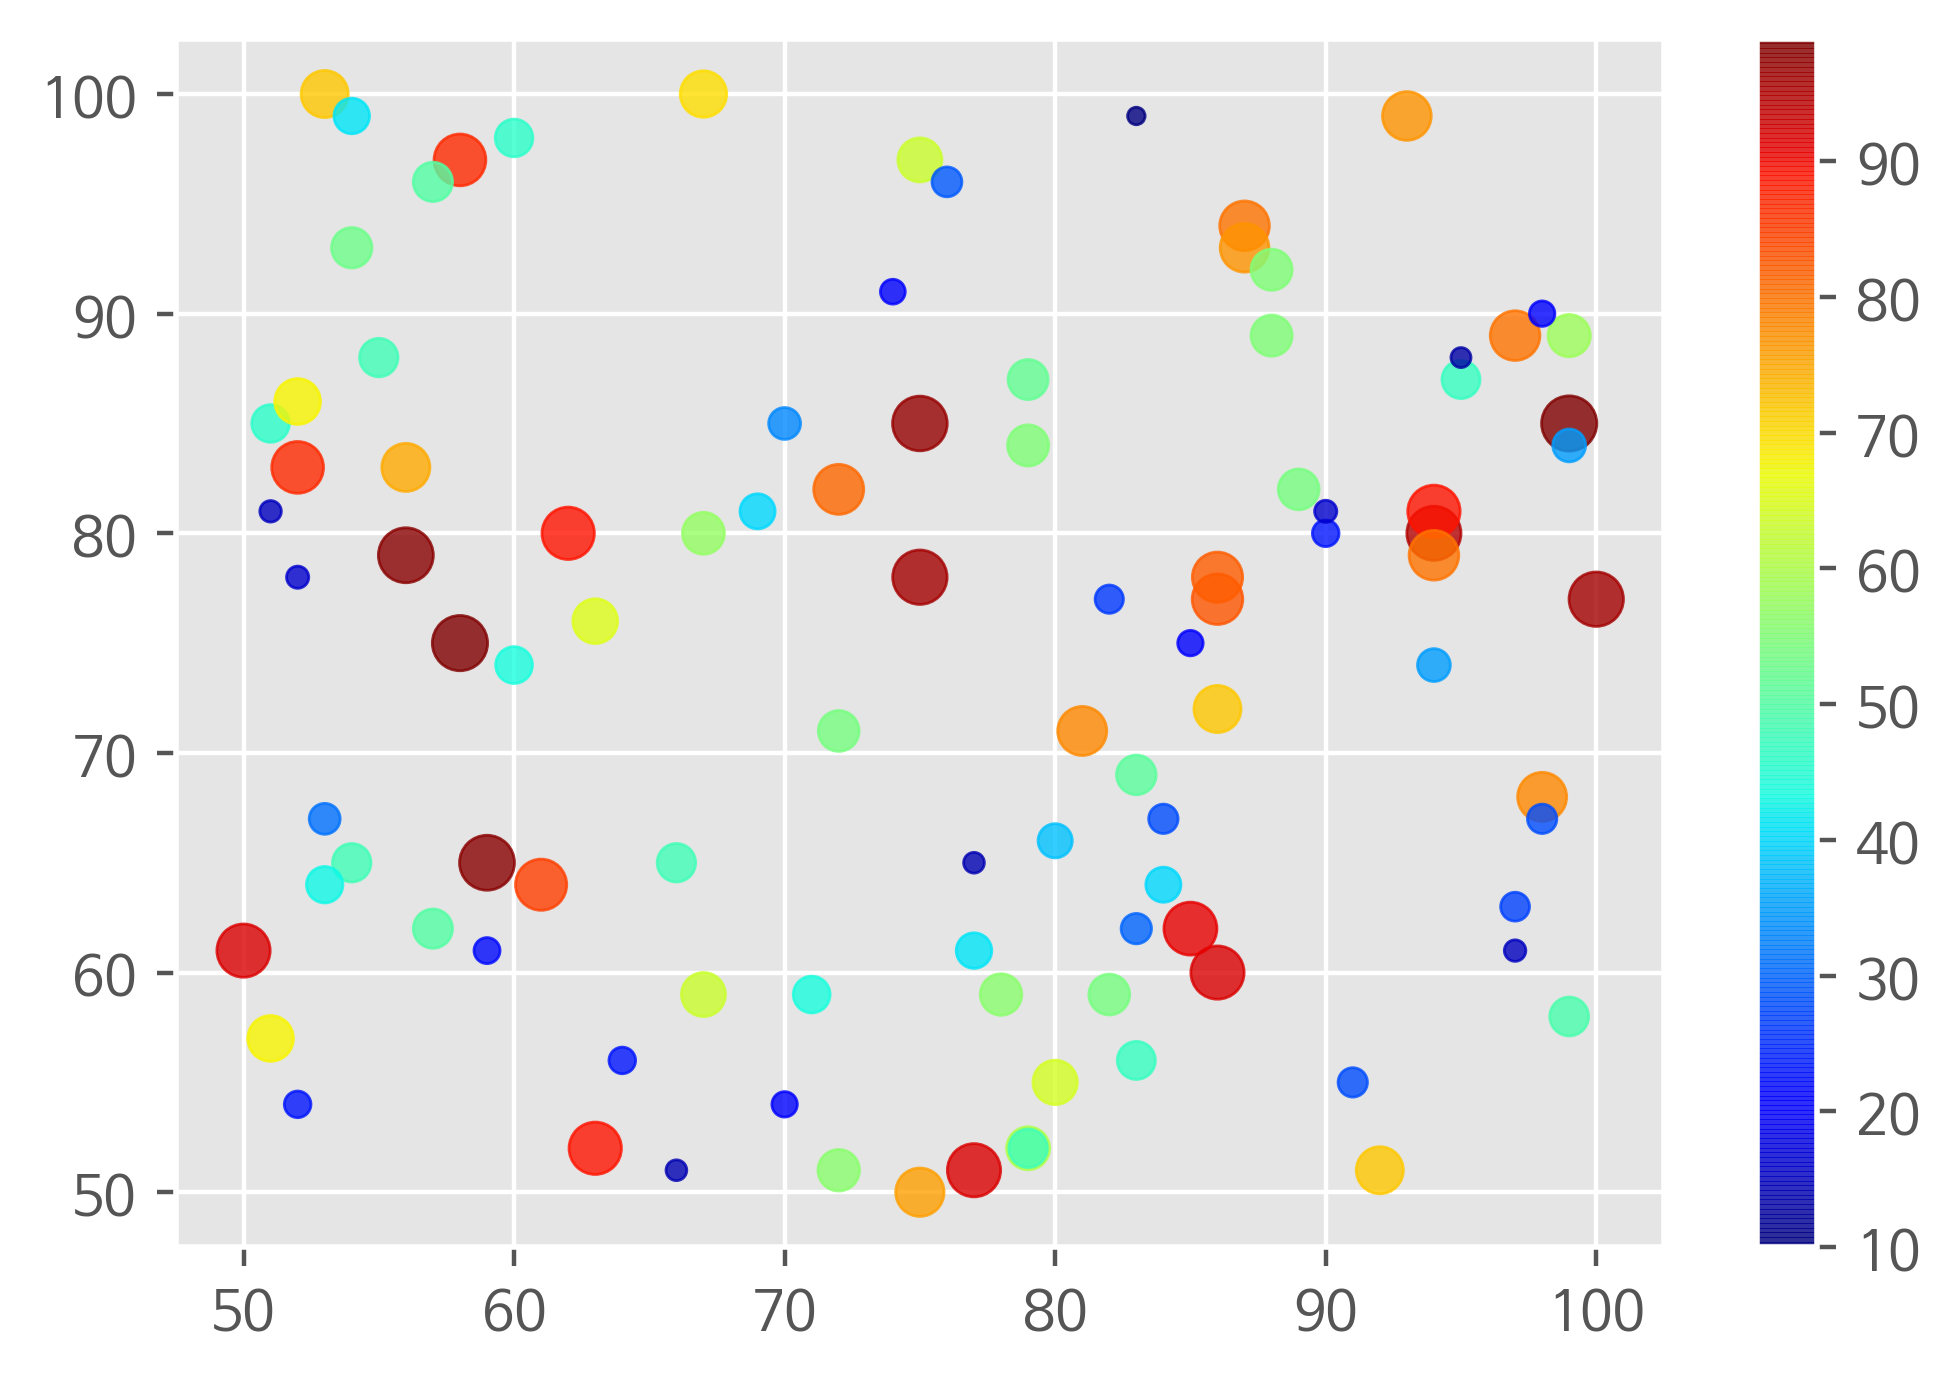

In [21]:
# alpha 투명도 추가 0~1: 0에 가까울수록 투명, 1에 가까울수록 불투명

plt.figure(dpi=200)
plt.style.use('ggplot')
plt.scatter(x,y, s=size, c=size, cmap='jet', alpha=0.8) #c=size 크기에 따라서 색깔을 다르게 해줘라
plt.colorbar()
plt.show()   

***제주도의 연령대별 성별 비율을 산점도로 표현하기***

***남녀 연령별 인구 데이터 scatter()함수로 표현하기***

찾고 싶은 지역명을 입력해주세요 :제주


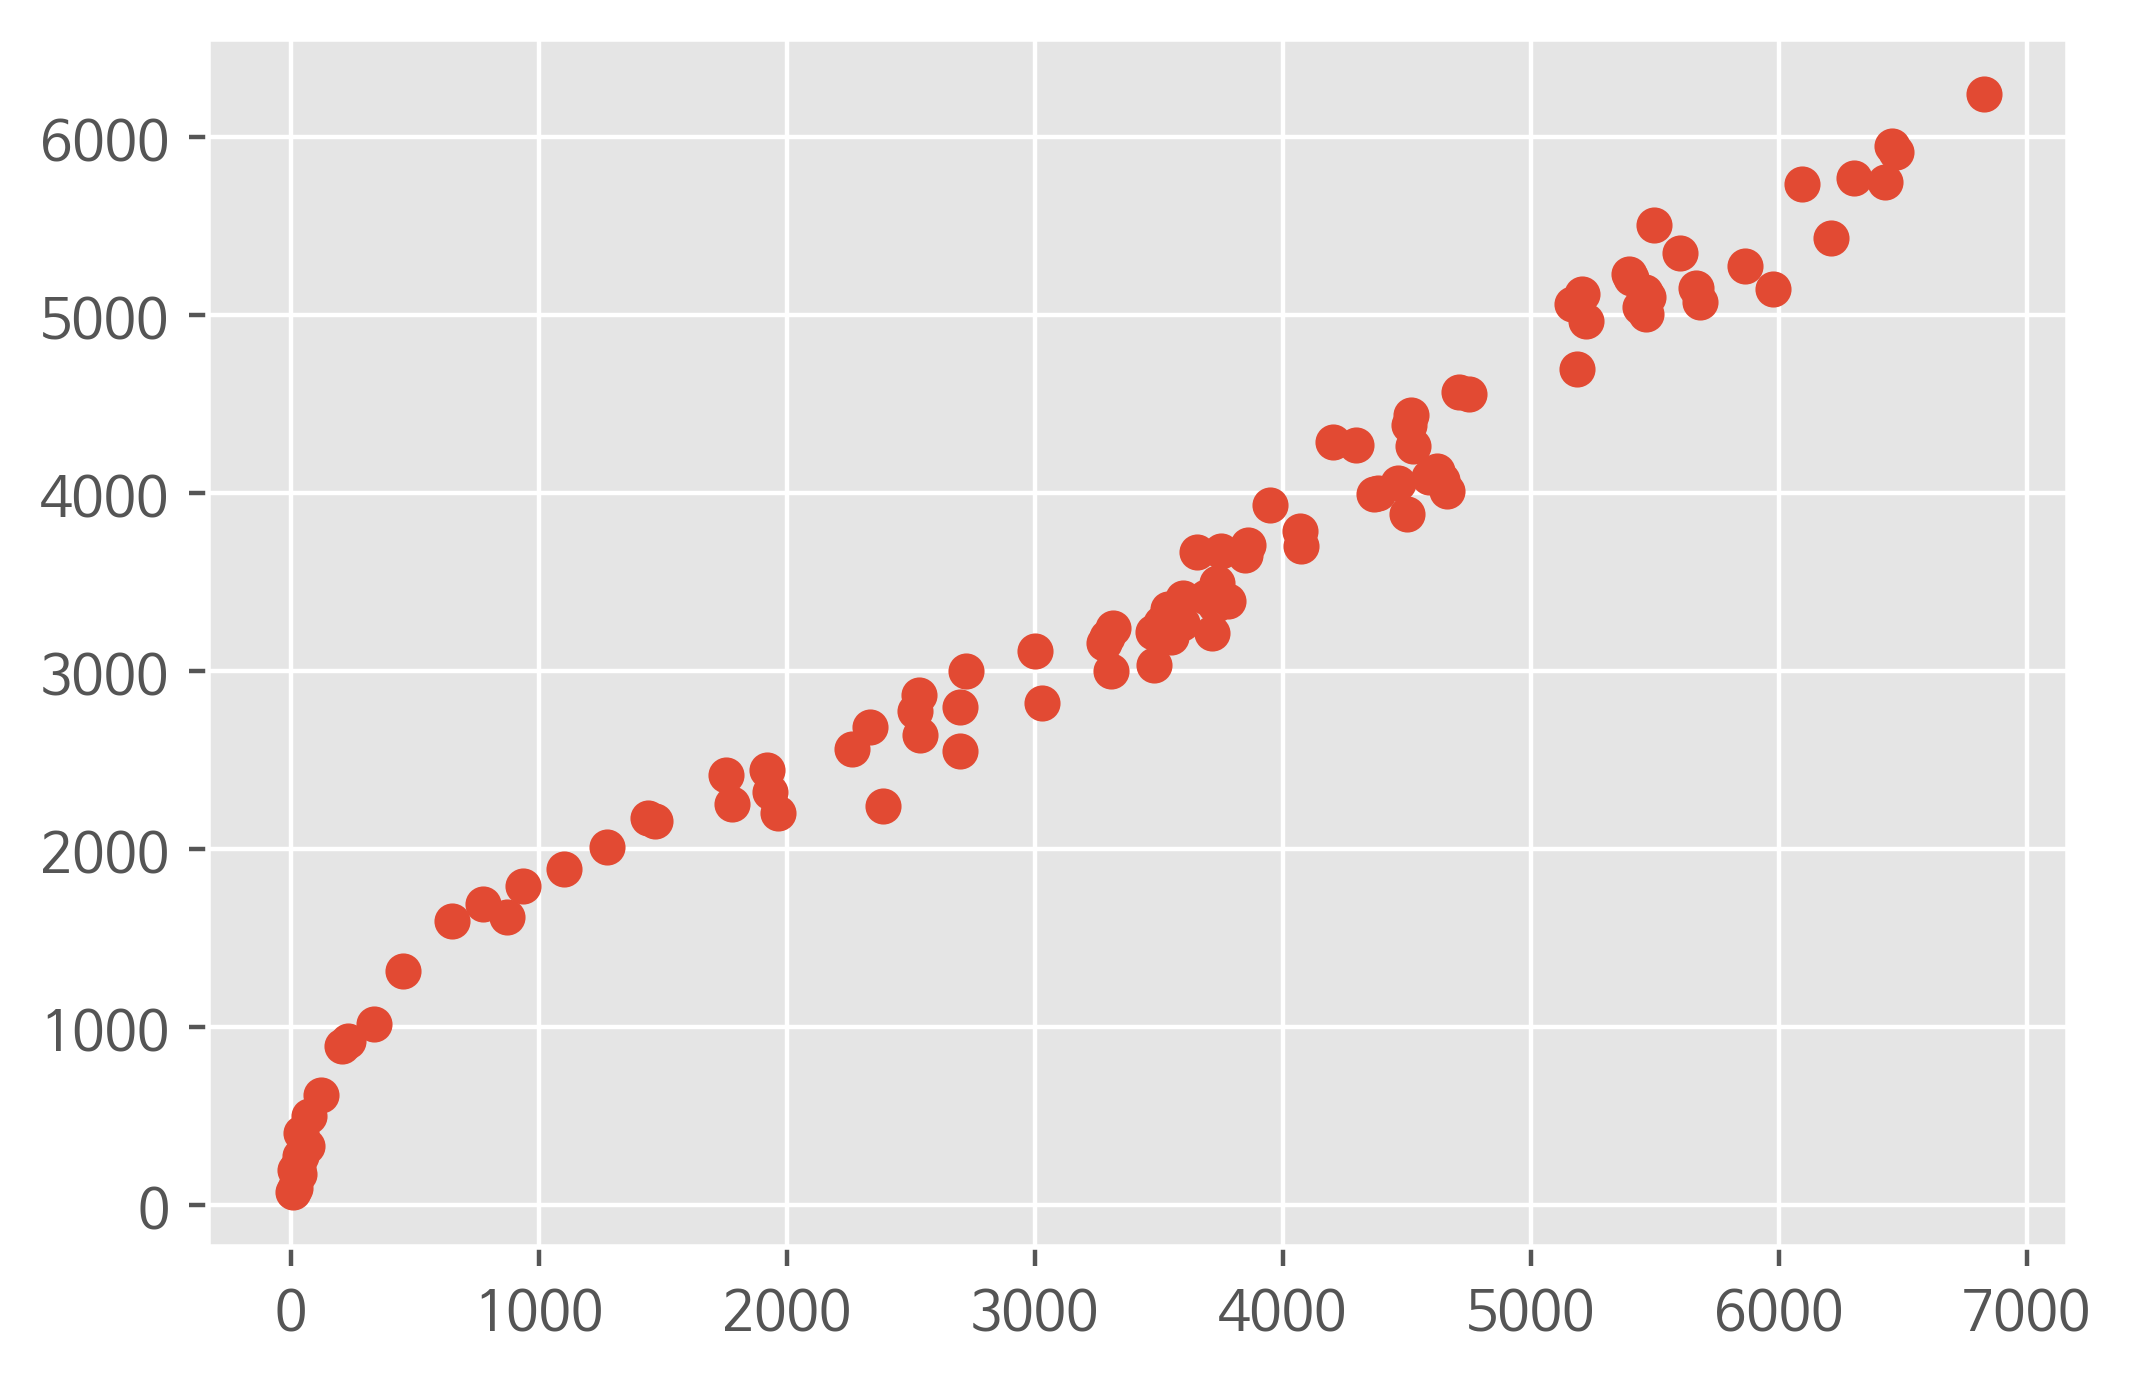

In [24]:
import csv
import matplotlib.pyplot as plt

f = open('gender.csv', 'r', encoding='cp949')
data = csv.reader(f)
next(data)

name = input('찾고 싶은 지역명을 입력해주세요 :')

m = []
f = []

for row in data:
  if name in row[0]:
    for i in row[3:104] :  # 남성 데이터 컬럼 3~103 개의 데이터를 슬라이싱 - 정수 데이터로 변환 -> m리스트에 저장
      m.append(int(i.replace(',','')))  # 항아리 차트를 그리기 위해 음수로 변환 시키는 작업을 먼저 해준다.
    for j in row[106:] :  # 여성 데이터 : 106~ 끝까지 데이터 슬라이싱 -> 정수 데이터로 변환 -> fe리스트에 저장
      f.append(int(j.replace(',','')))
    break  # 첫번째 데이터만 확인하고 탈출하기 위해서

f.reverse    
 # 시각화 설정
plt.figure(dpi = 200)
plt.style.use('ggplot')
plt.rc('font', family = 'NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

#산점도 그래프로 남여 인구수 데이터 표현하기
plt.scatter(m,f)
plt.show()     

y=x 형태의 추세선 추가하기

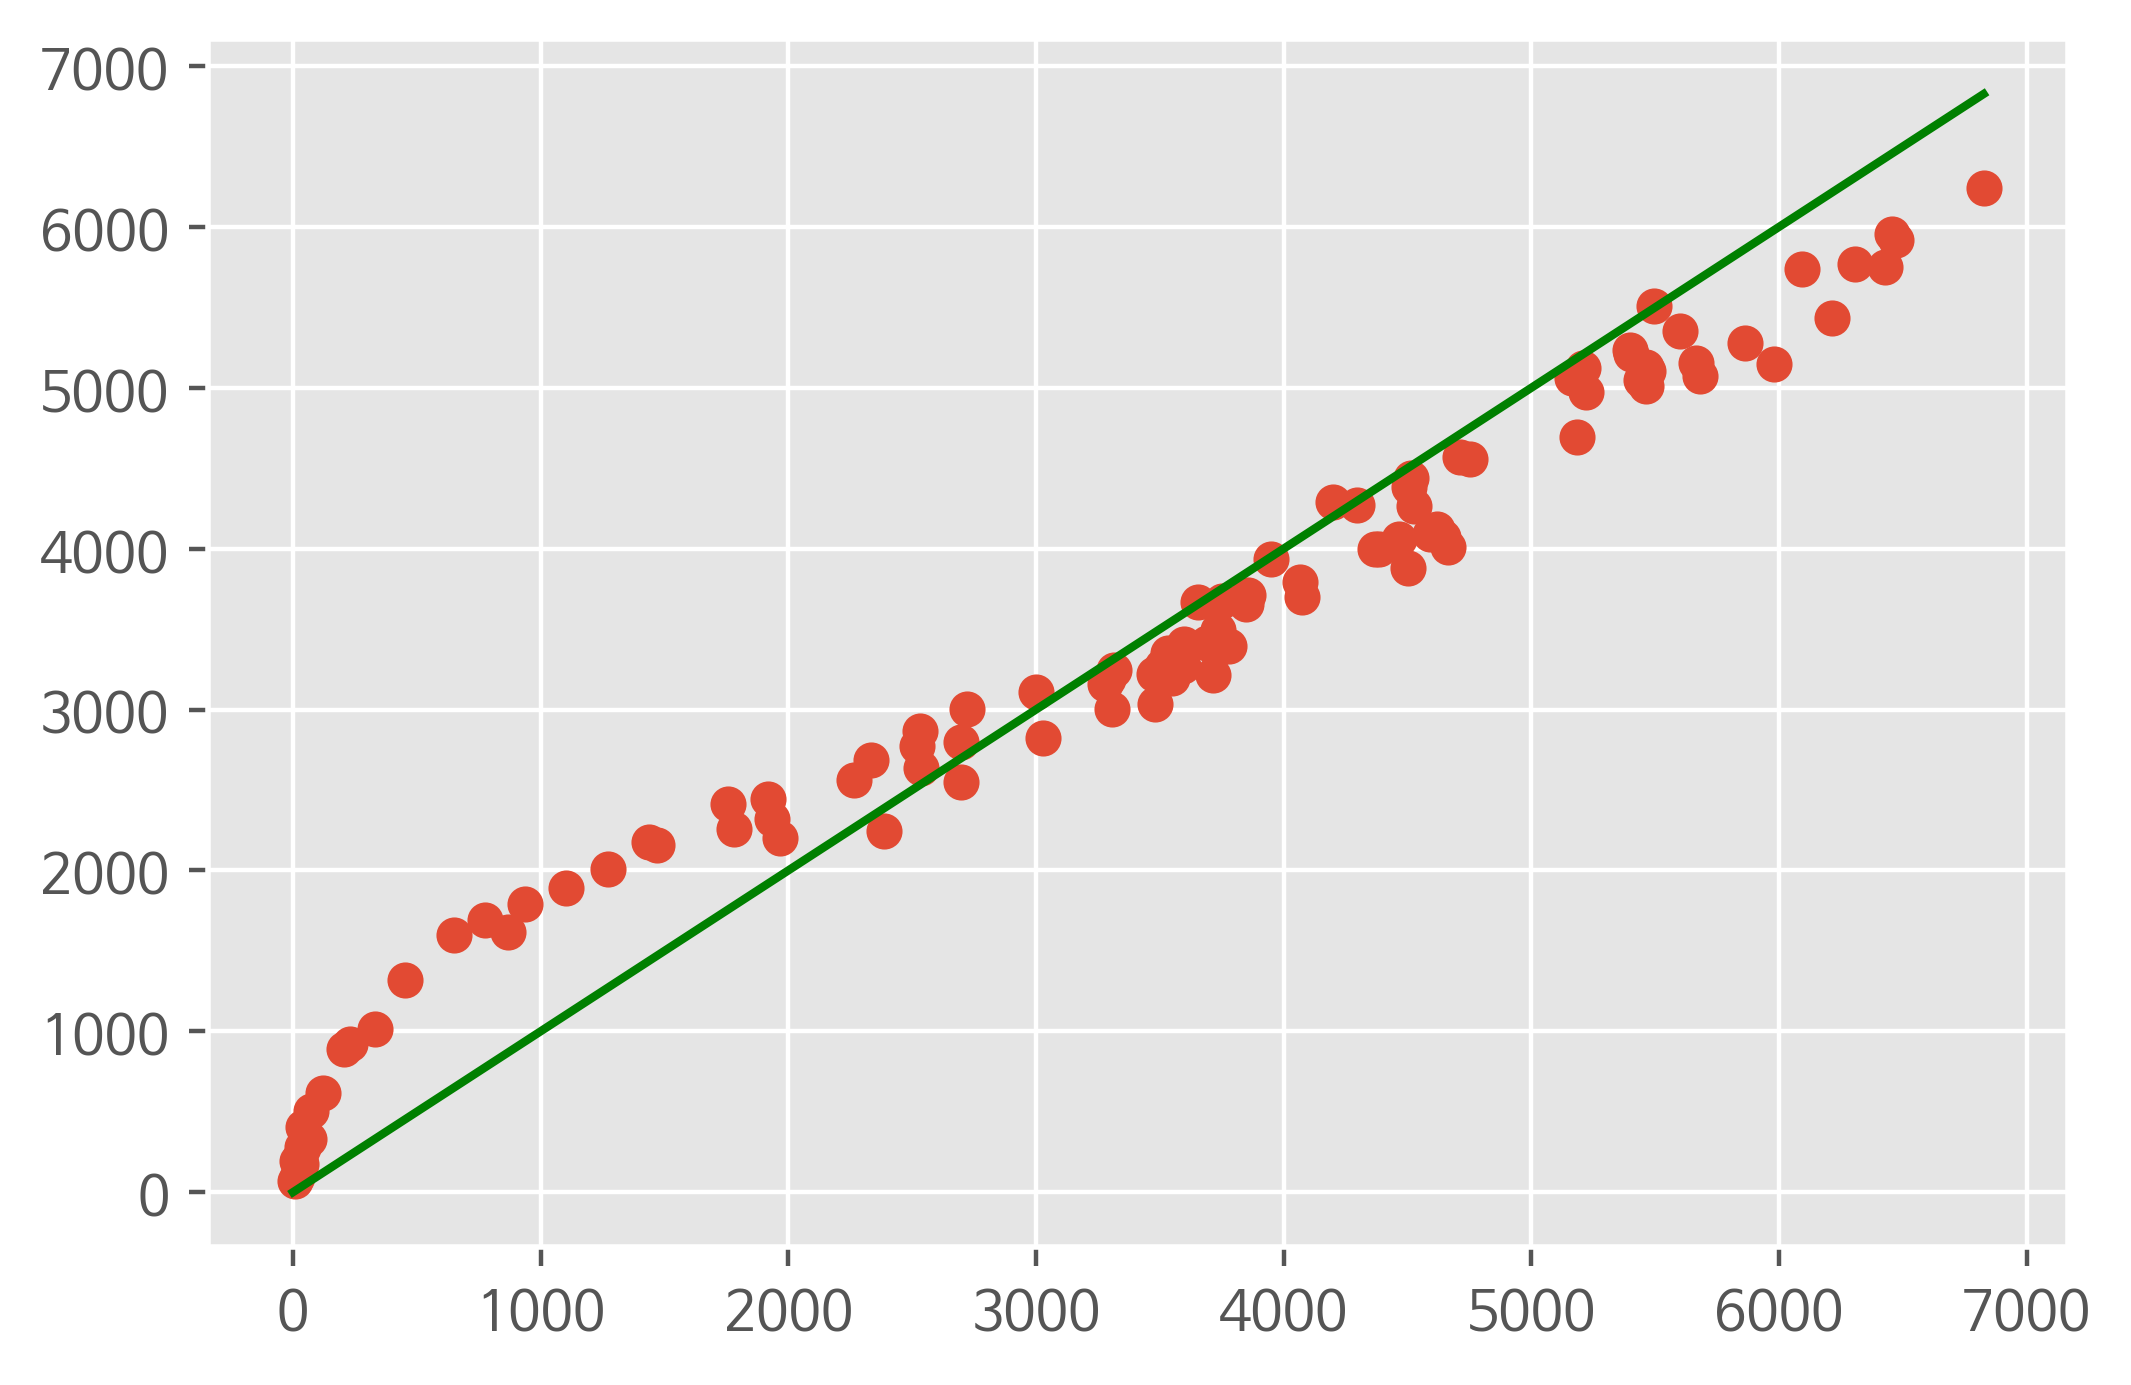

In [29]:
#산점도 그래프로 남여 인구수 데이터 표현하기
plt.figure(dpi = 200)
plt.scatter(m,f) #x축은 남자, y축은 여자
plt.plot(range(max(m)),range(max(m)), 'g')
plt.show()     

#추세선을 기준으로 위에 있으면 여자 비율이 높고 아래면 남자가 많다는걸 쉽게 보여준다.

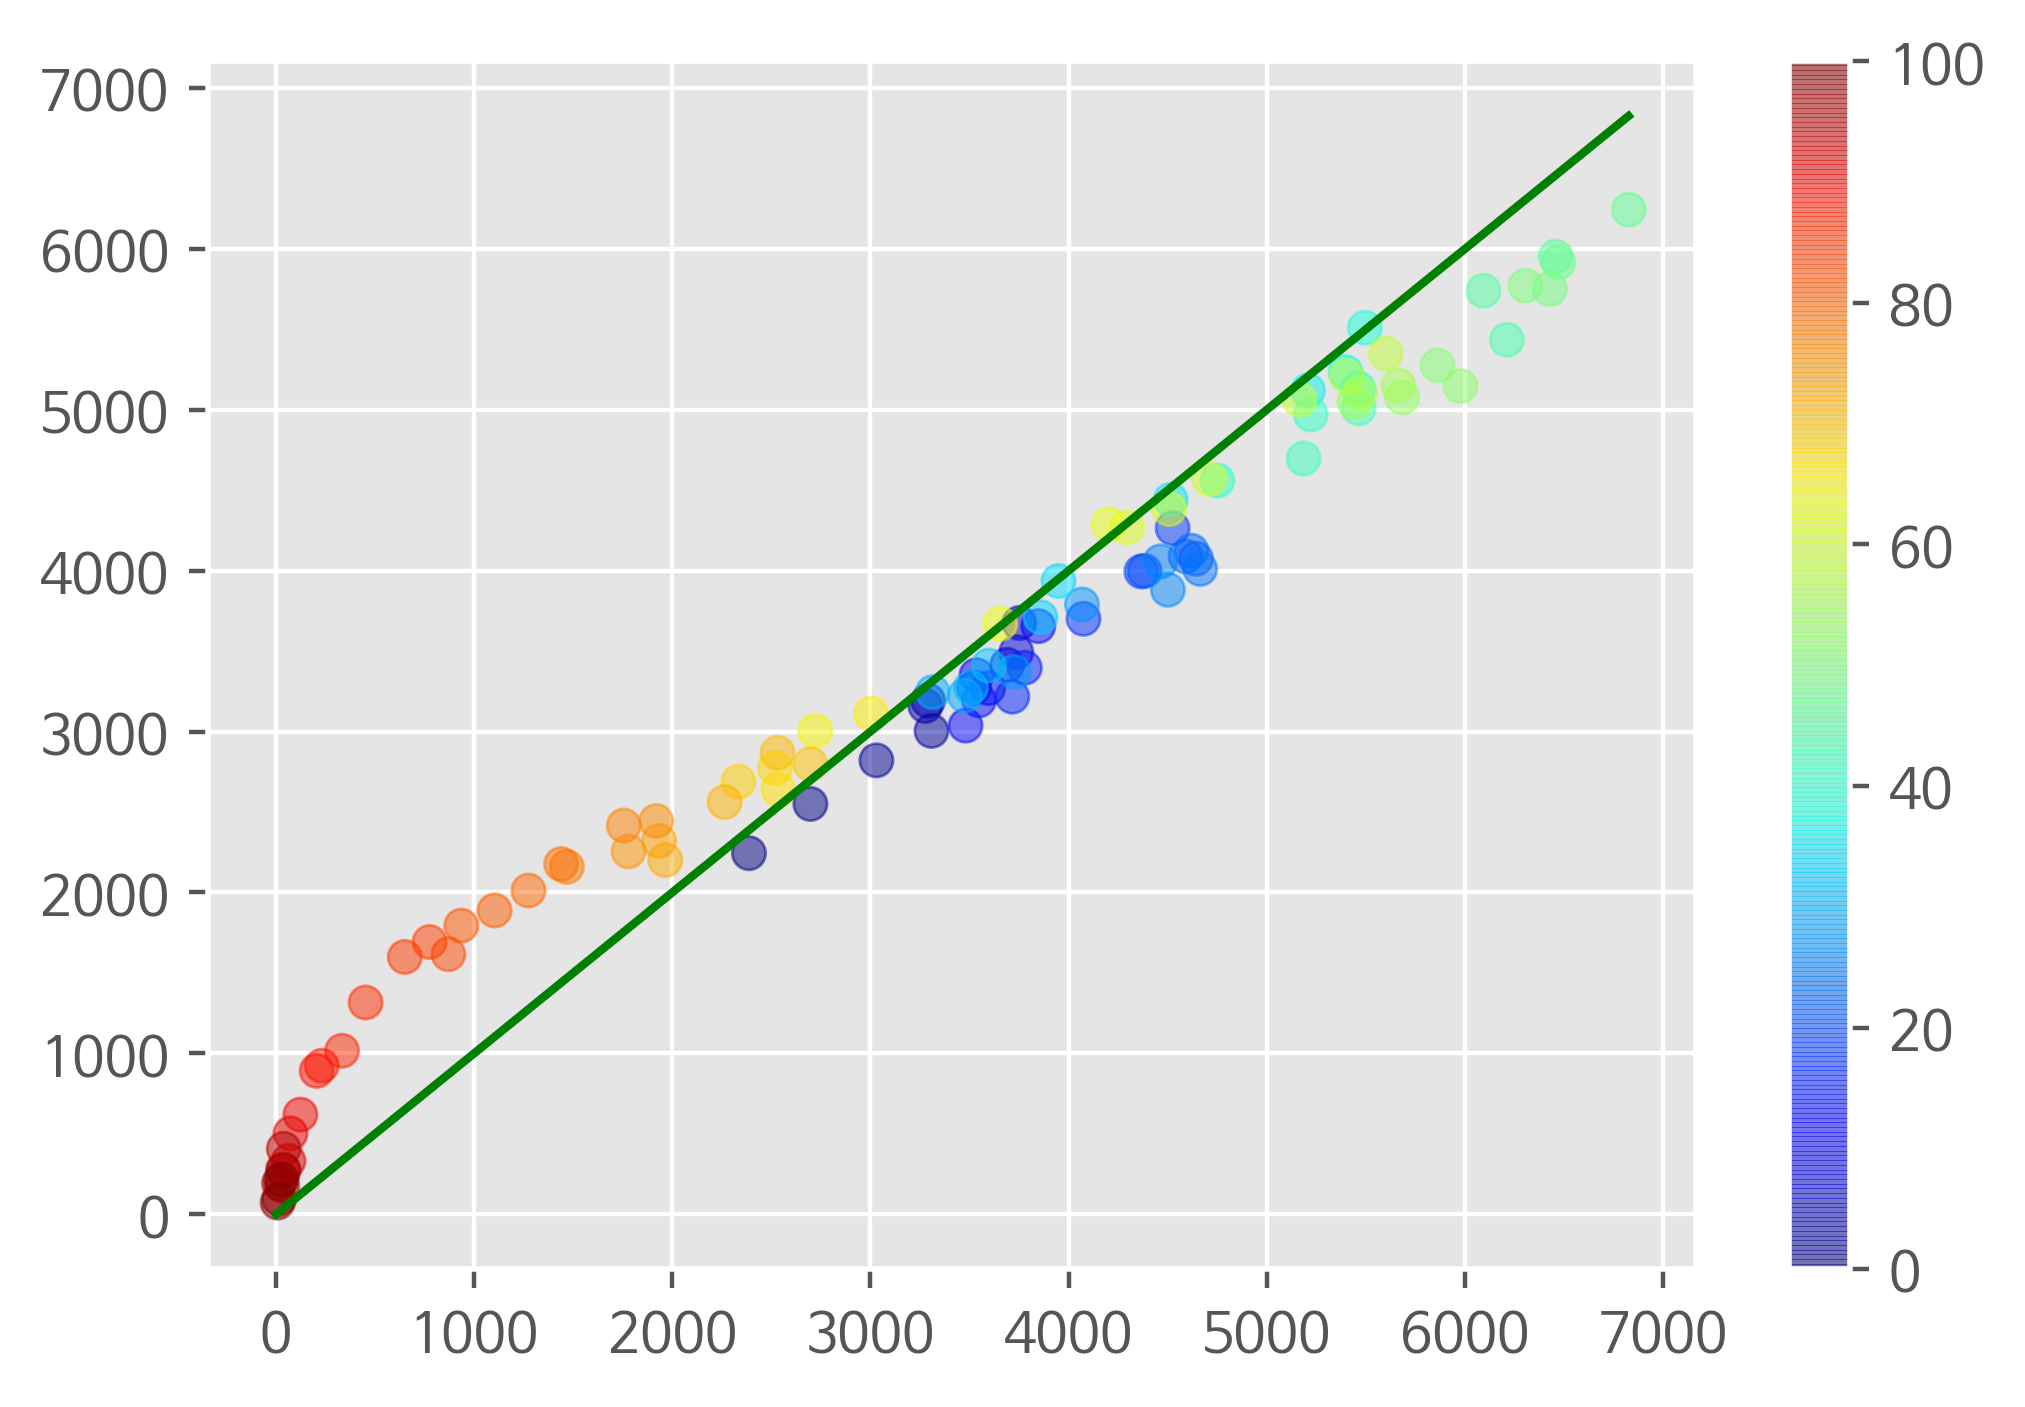

In [31]:
#산점도 그래프로 남여 인구수 데이터 표현하기
plt.figure(dpi = 200)
plt.scatter(m,f, c=range(101), cmap='jet', alpha=0.5) #x축은 남자, y축은 여자
plt.plot(range(max(m)),range(max(m)), 'g')
plt.colorbar()
plt.show()     
